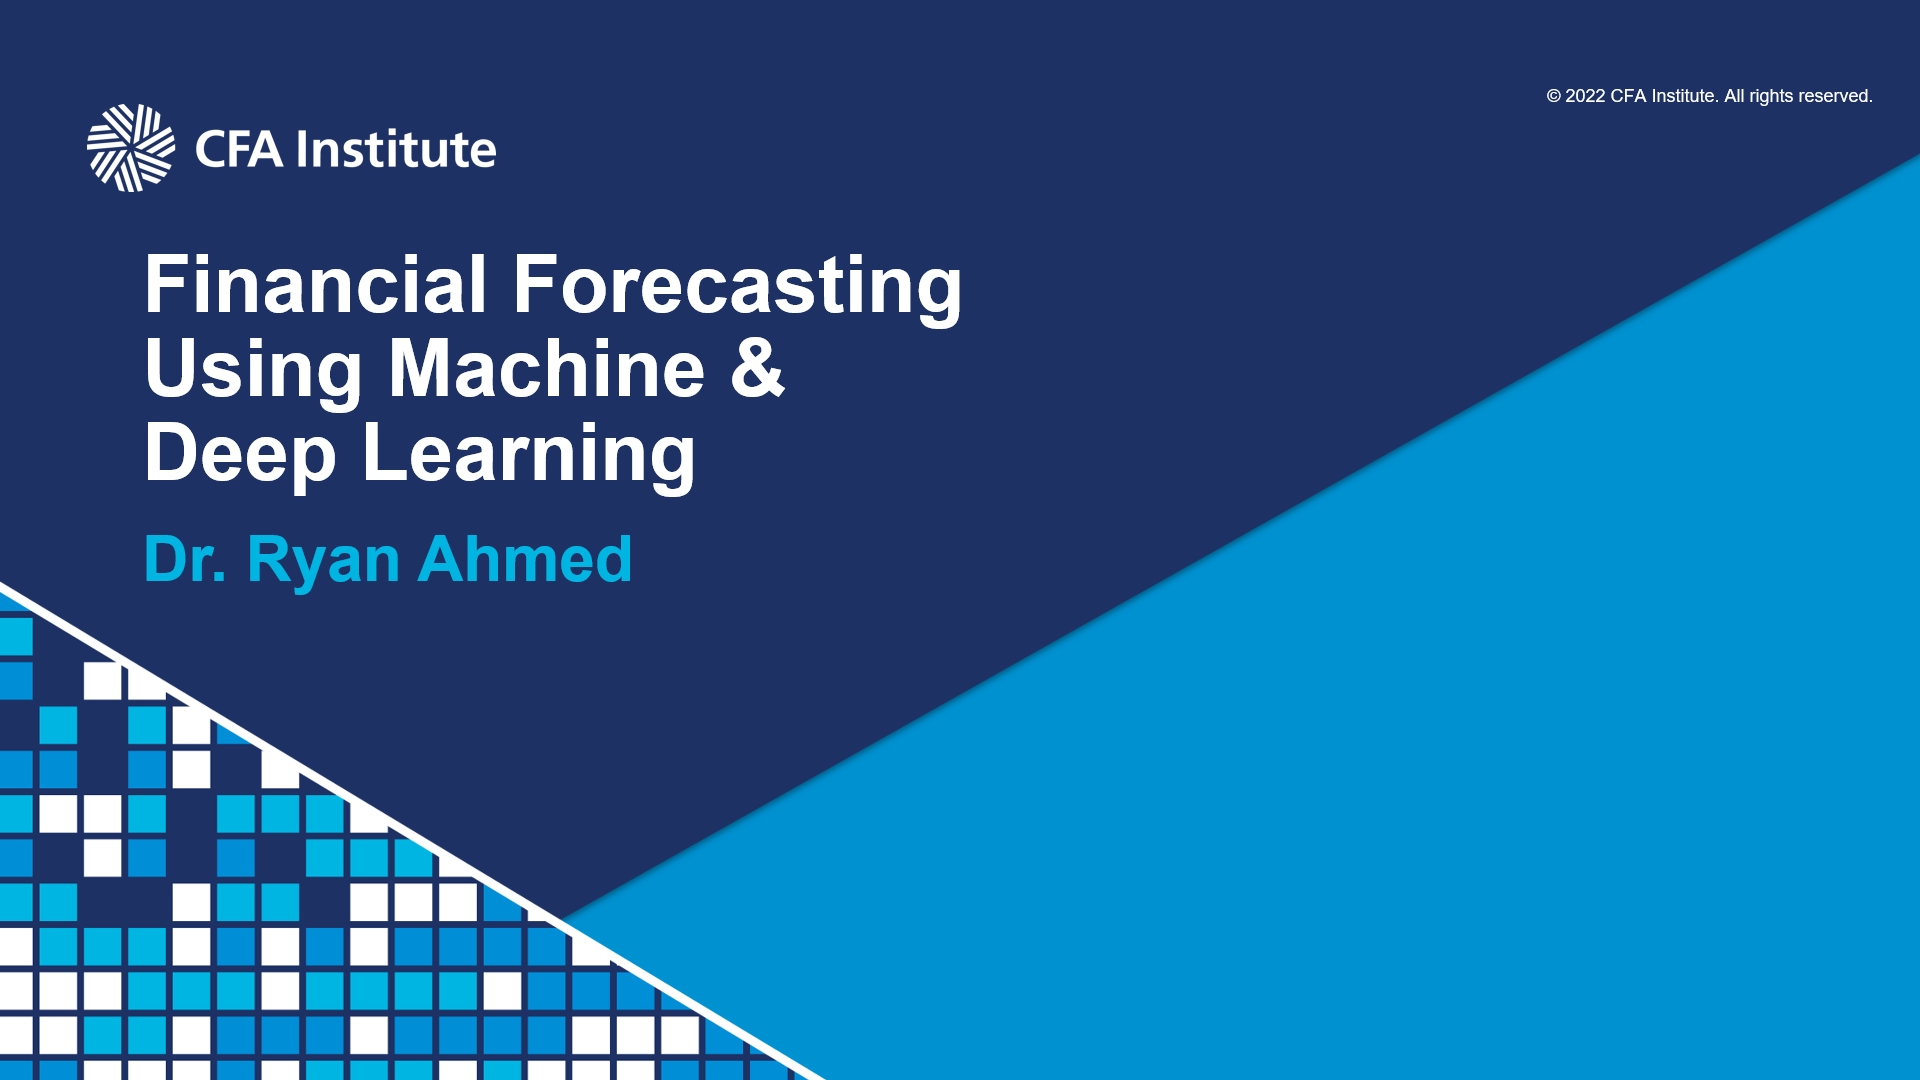

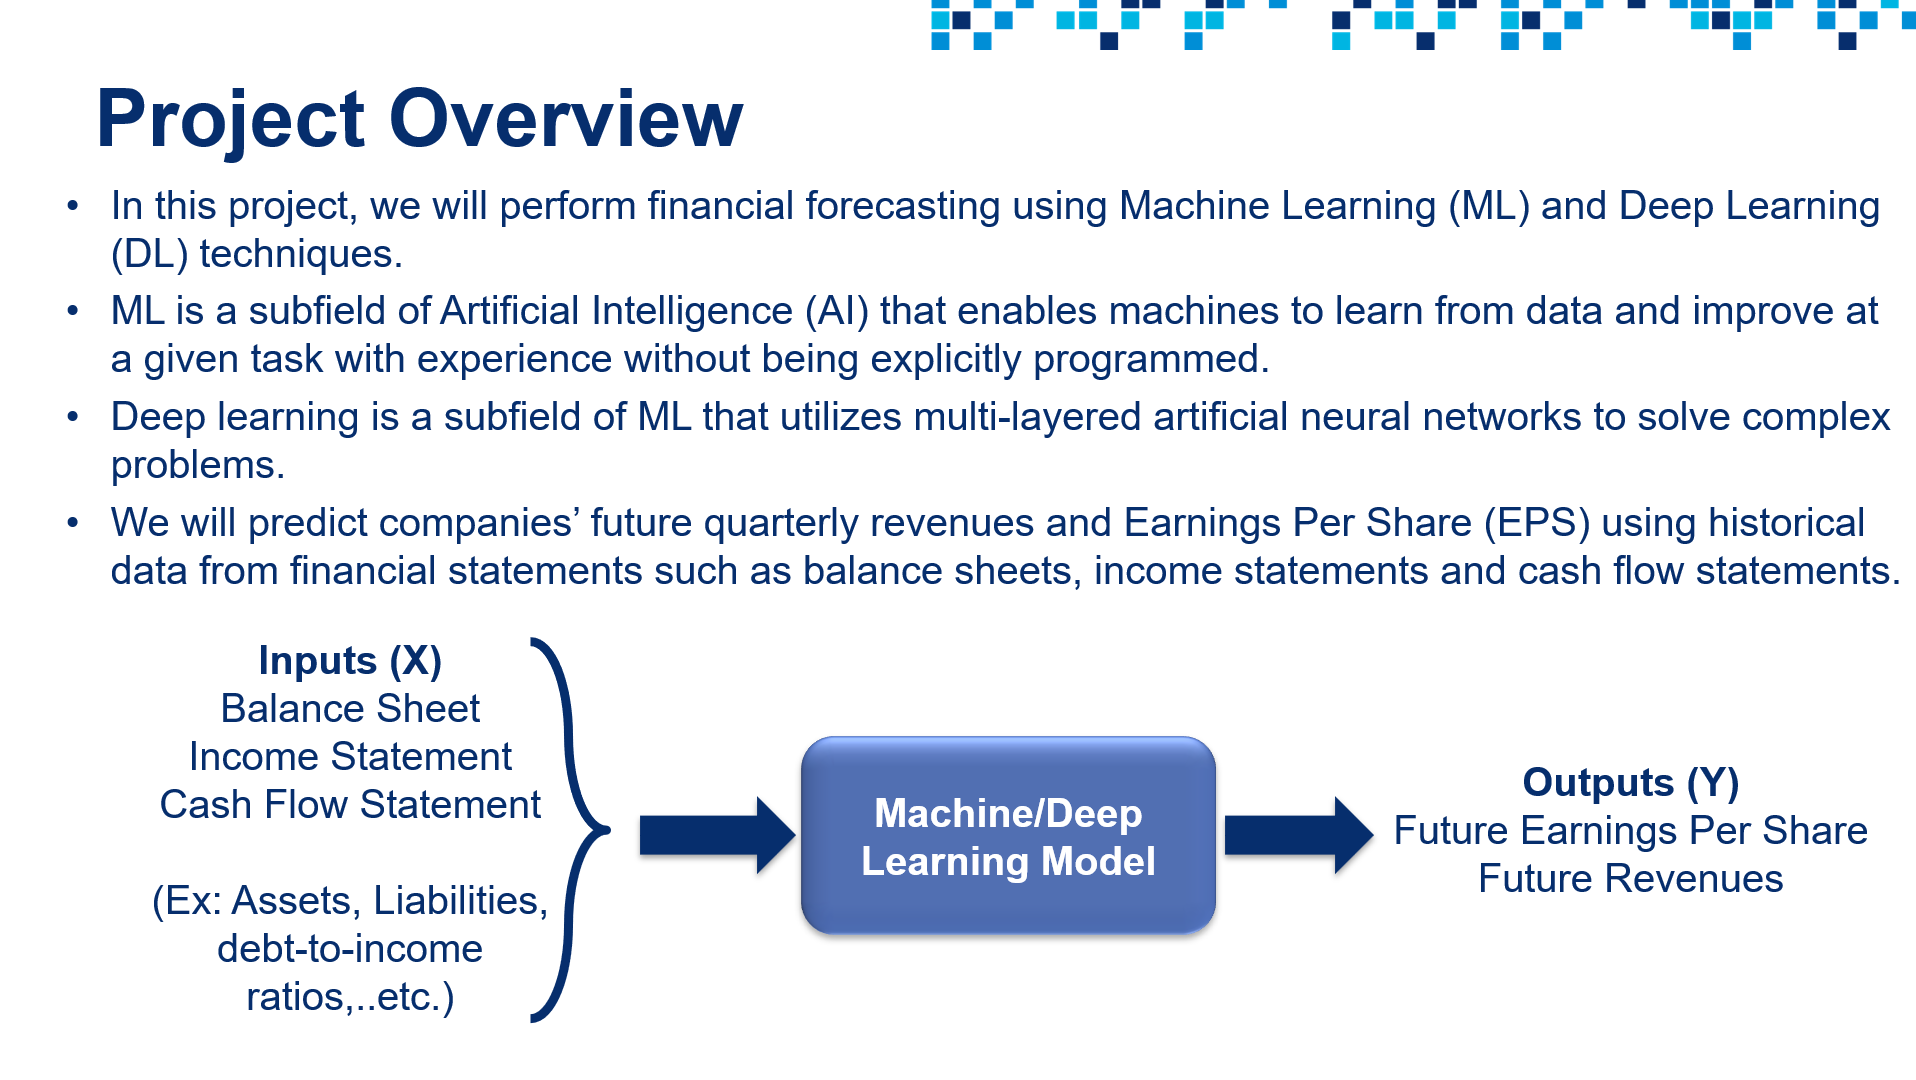

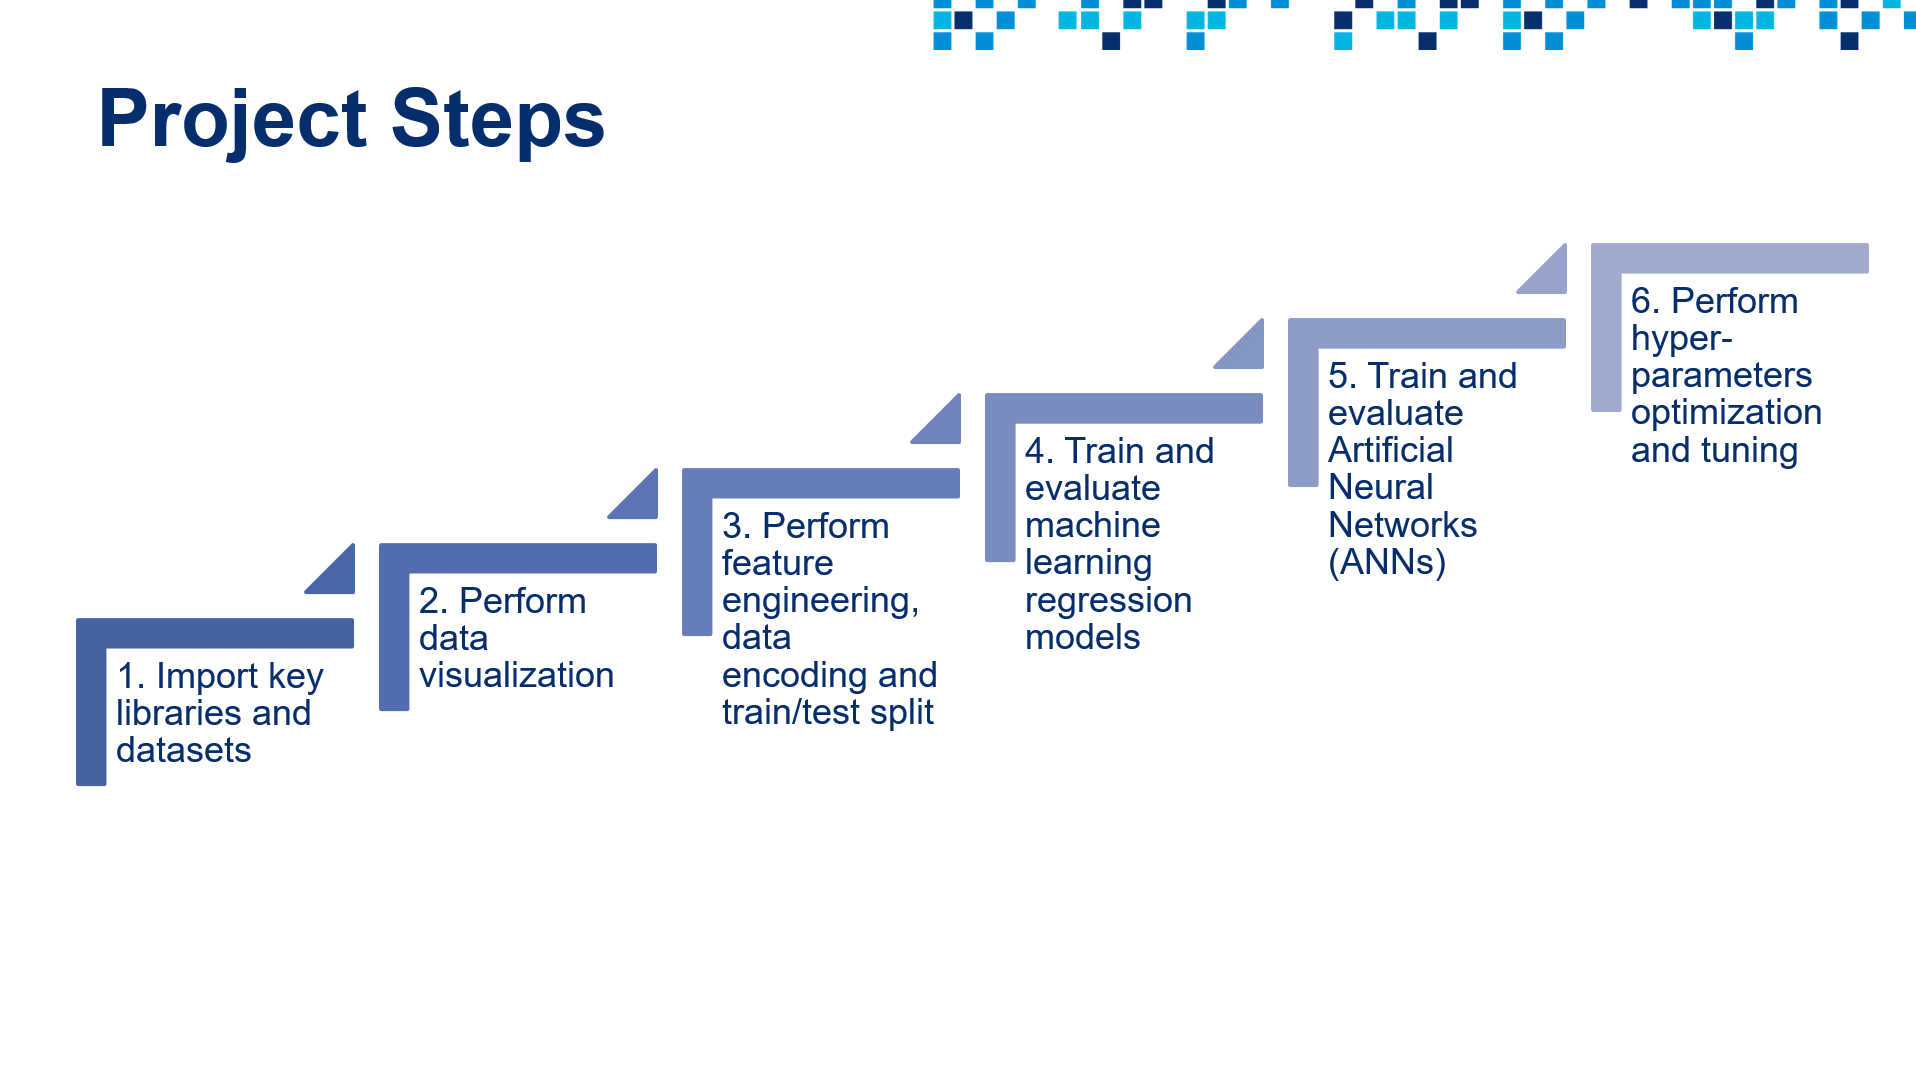

# IMPORT DATASET AND PERFORM BASIC DATA EXPLORATION

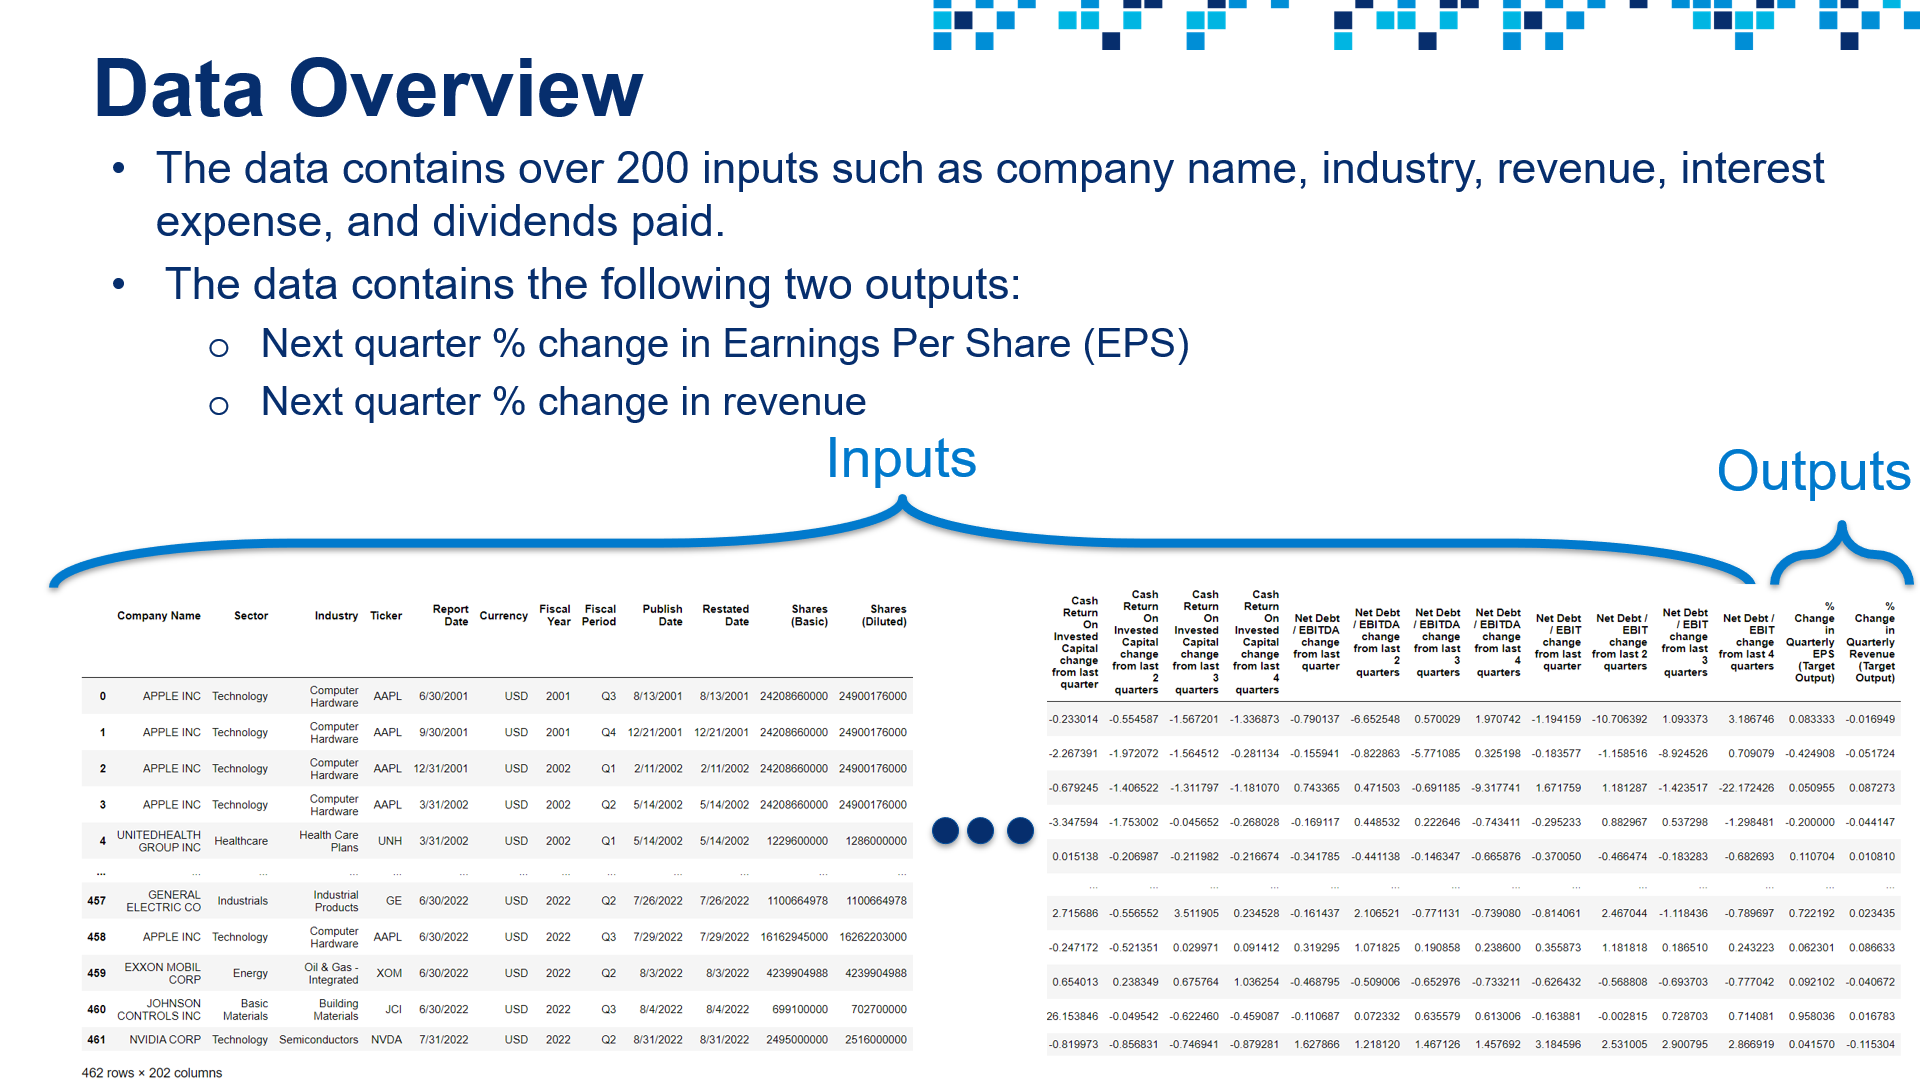

In [ ]:
# Let's install key libraries

# Pandas is a data manipulation and analysis tool that uses a data structure known as DataFrame
# DataFrames empower programmers to store and manipulate data in a tabular fashion (rows & columns)
# !pip install pandas==1.3.5
!pip install pandas

In [ ]:

# Scikit-learn is a free machine learning library for the Python programming language 
# It has several classification, regression and clustering algorithms 
# !pip install scikit-learn==1.0.2
!pip install scikit-learn

In [ ]:
# Import Pandas library into the current environment, note that "pd" is an alias name for "Pandas" 
import pandas as pd

In [ ]:
# The data contains 200+ columns so let's increase the maximum number of rows and columns to display 

# pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)

# Let's ignore warnings
# Some operations might raise a warning and we want to ignore them
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Use Pandas to read financial data in "financial.csv" file which is included in the course package
df = pd.read_csv('financial_data.csv')

In [ ]:
# Dataframe preview
df

In [ ]:
# Let's display column names
df.columns.tolist()

In [ ]:
# Let's view the number of unique stock ticker symbols available in the Pandas DataFrame
df['Ticker'].nunique()

In [ ]:
# Let's view the names of unique stock ticker symbols available in the Pandas DataFrame
df['Ticker'].unique()

In [ ]:
# Let's display a statistical summary of the Pandas DataFrame
df.describe()

**PRACTICE OPPORTUNITY:** 
- **Write a Python code that performs the following tasks:**
     - **Filter out the Pandas DataFrame df to only select rows containing Apple data with Ticker Symbol 'AAPL'. Place the results in a new Pandas DataFrame titled apple_df.**
     - **Obtain the maximum quarterly revenue of Apple and the corresponding date**
     - **Perform a sanity check by comparing the calculated maximum quarterly revenue with numbers posted online on Yahoo Finance: https://ca.finance.yahoo.com/quote/AAPL/financials?p=AAPL**

In [ ]:
apple_df = df[df['Ticker'] == 'AAPL']
apple_df

In [ ]:
apple_df[apple_df['Revenue'] == apple_df['Revenue'].max()]

# PERFORM DATA VISUALIZATION

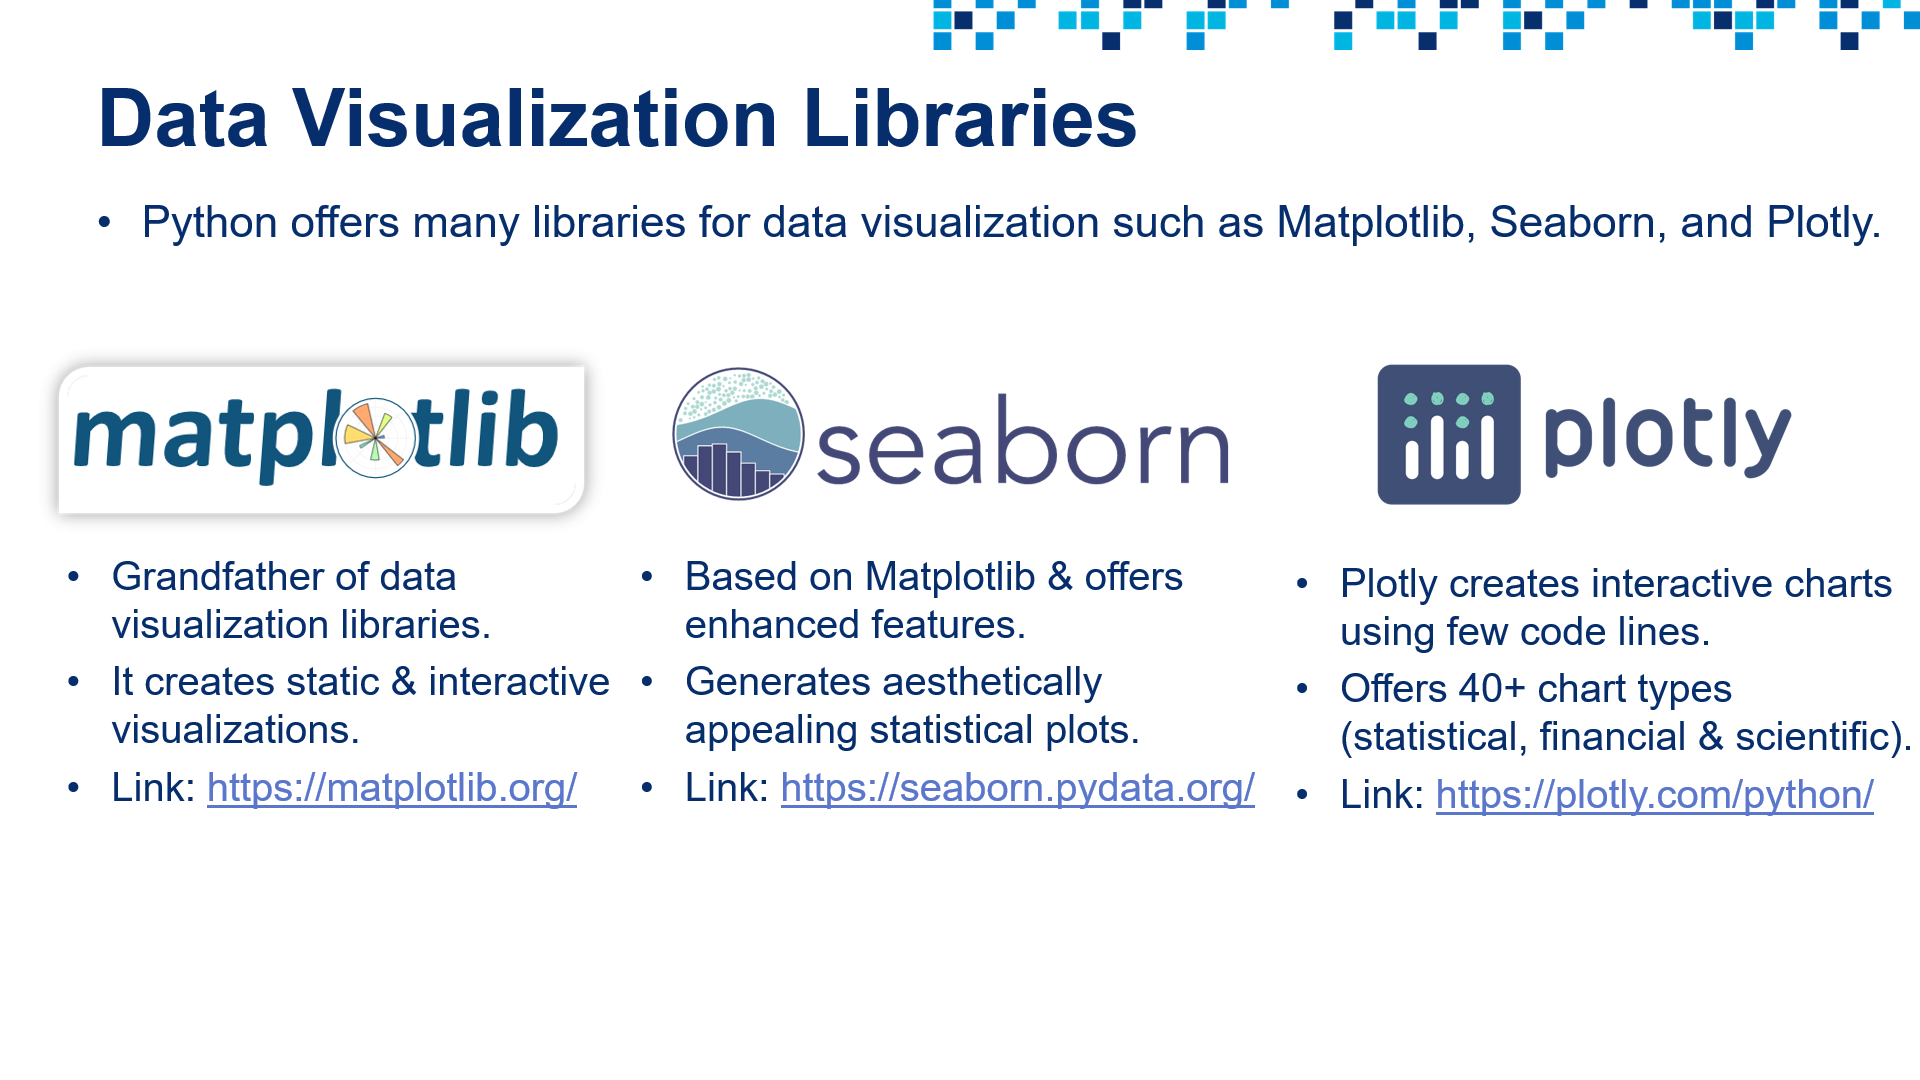

- Link to Matplotlib Documentation: https://matplotlib.org/
- Link to Seaborn Documentation: https://seaborn.pydata.org/
- Link to Plotly Documentation: https://plotly.com/python/

In [ ]:
# Matplotlib is a comprehensive data visualization library in Python 
# Seaborn is a visualization library that sits on top of matplotlib and offers enhanced features 
# plotly.express module contains functions that can create interactive figures using a few lines of code
# Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures

!pip install plotly 
import plotly.express as px

!pip install seaborn
import seaborn as sns

!pip install matplotlib
import matplotlib.pyplot as plt


In [ ]:
# We will focus our analysis on predicting the % Change in Quarterly EPS (Target Output)
# Let's Drop the "% Change in Quarterly Revenue (Target Output)" column

apple_df = apple_df.drop(columns = '% Change in Quarterly Revenue (Target Output)')
apple_df

In [ ]:
# Let's plot the histogram for the target column (output) for Apple
fig = px.histogram(apple_df['% Change in Quarterly EPS (Target Output)'] * 100, nbins = 30)
fig.update_layout({'plot_bgcolor': "white"})

In [ ]:
# Let's calculate the correlation matrix
correlation_matrix = apple_df.select_dtypes(include='number').corr()
correlation_matrix

In [ ]:
# Let's view correlation coefficients for every feature with the target output 
correlation_matrix[['% Change in Quarterly EPS (Target Output)']]

In [ ]:
# Let's sort the correlation values in a descending order
# Let's display the top 10 positively correlated features with the output (target column)
top_positive_corr = correlation_matrix[['% Change in Quarterly EPS (Target Output)']].sort_values( '% Change in Quarterly EPS (Target Output)', ascending = False)[:10]
top_positive_corr

In [ ]:
# Let's obtain the top 10 negatively correlated features with the output (target column)
top_negative_corr = correlation_matrix[['% Change in Quarterly EPS (Target Output)']].sort_values('% Change in Quarterly EPS (Target Output)')[:10]
top_negative_corr

In [ ]:
# Let's display the top positively and negatively correlated features with the output 
apple_df[top_negative_corr.reset_index()['index'].tolist() + top_positive_corr.reset_index()['index'].tolist()]

In [ ]:
# Let's re-calculate the correlation matrix to only calculate the top 10 positively and negatively correlated features 
correlation_matrix = apple_df[top_negative_corr.reset_index()['index'].tolist() + 
                              top_positive_corr.reset_index()['index'].tolist()].corr()
correlation_matrix

In [ ]:
# Let's use Seaborn to display a heatmap for the correlation matrix
f, ax = plt.subplots(figsize = (15, 9))
sns.heatmap(correlation_matrix, annot = True);

**PRACTICE OPPORTUNITY:**
- **Write a Python code that performs the following tasks:**
    - **Filter out the Pandas DataFrame df to only contain rows pertaining to Nvidia corporation (Ticker Symbol: NVDA)**
    - **Display the histogram for the output column "% Change in Quarterly EPS (Target Output)" for Nvidia corporation using 100 bins**

# PERFORM ONE-HOT ENCODING

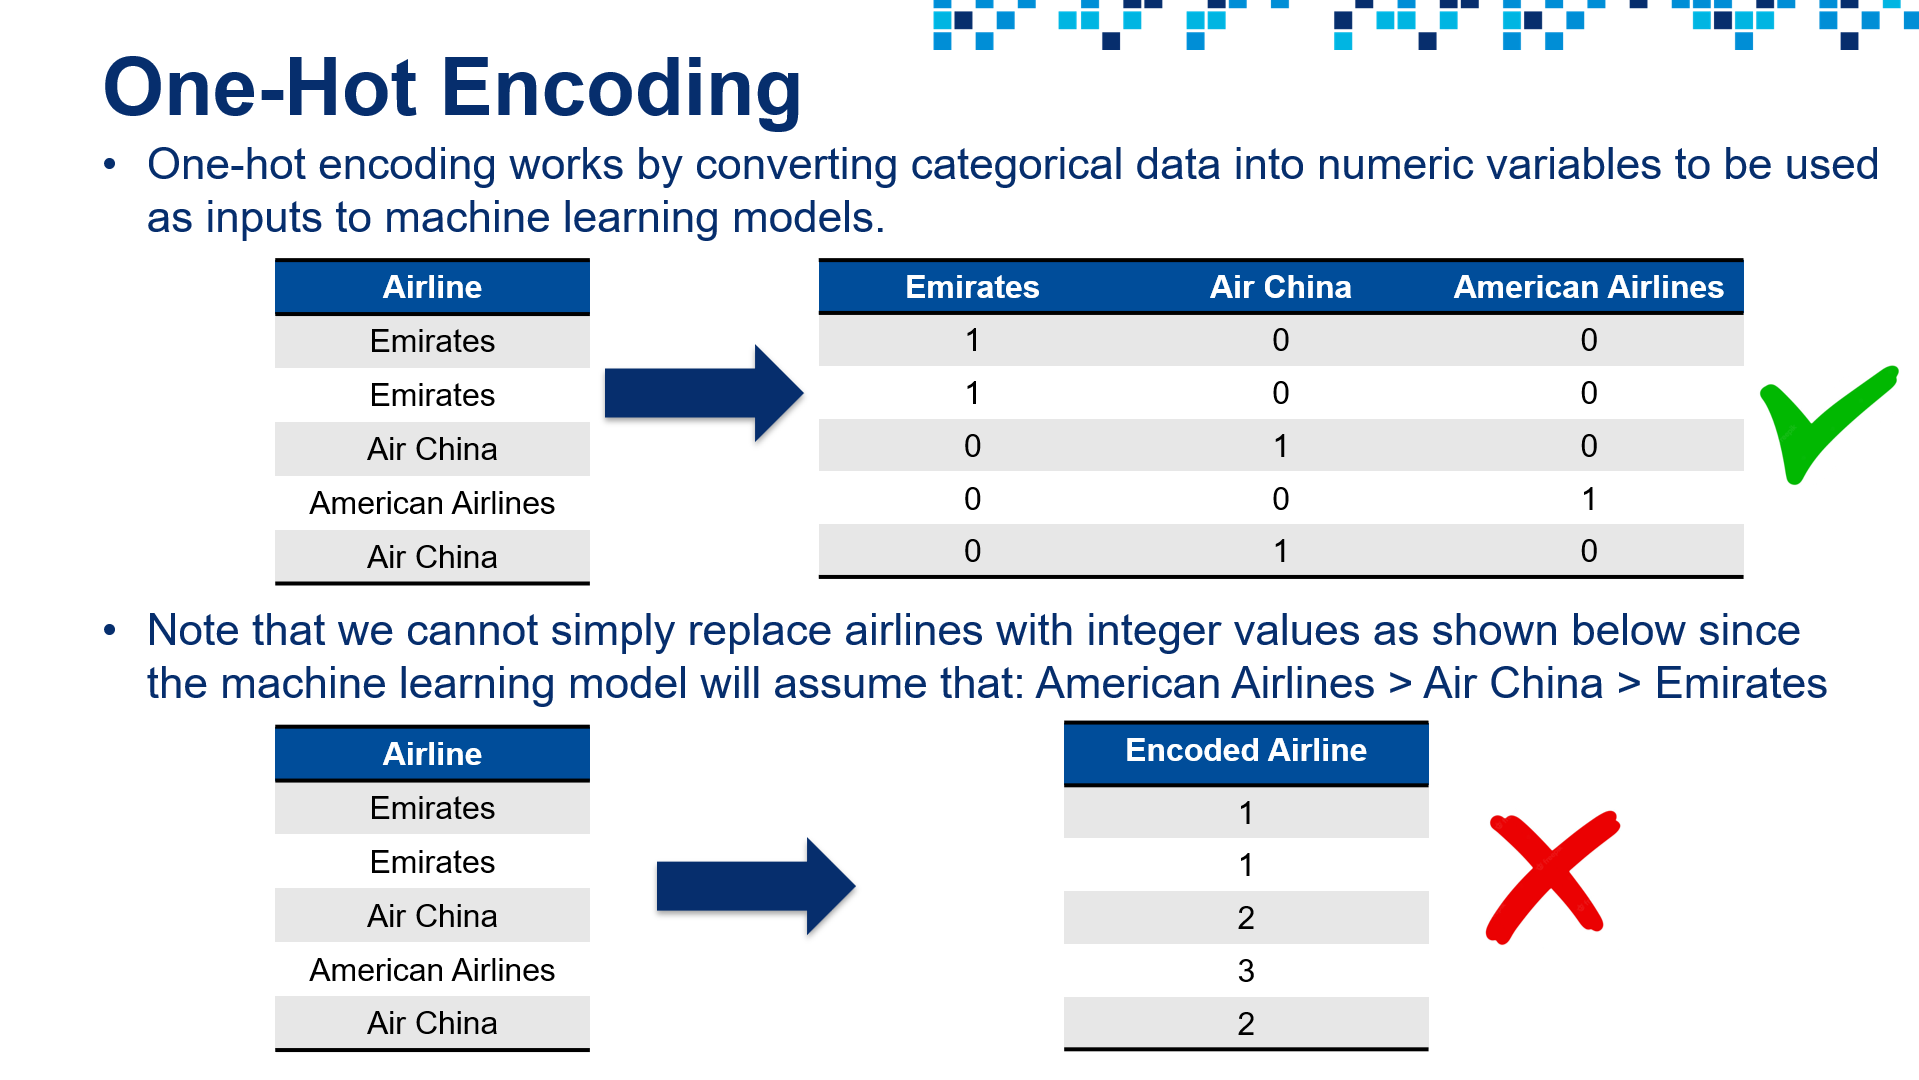

In [ ]:
# Let's display Pandas DataFrame information
# Note that "Publish Date" column is listed as object data type
apple_df.info(200)

In [ ]:
# Let's convert "Publish Date" column to datetime
# Python has a module dedicated to deal with date and time data known as datetime
apple_df['Publish Date'] = pd.to_datetime(apple_df['Publish Date'])

In [ ]:
# Let's display the Pandas DataFrame information
apple_df.info(200)

In [ ]:
# Sorting the DataFrame in an ascending order based on the "Publish Date" column 
apple_df.sort_values(by = 'Publish Date', ascending = True, inplace = True)
apple_df

In [ ]:
# Let's drop the following columns from the Pandas DataFrame
cols_to_drop = ['Ticker','Sector', 'Industry','Company Name', 'Report Date', 'Currency',
                'Fiscal Year', 'Publish Date', 'Restated Date']

apple_df = apple_df.drop(columns = cols_to_drop)
apple_df

In [ ]:
# Let's perform one-hot encoding to the "Fiscal Period" column

# Let's display the original "Fiscal Period" column
print(apple_df['Fiscal Period'])

# Let's display the one-hot encoded version of the "Fiscal Period" column
fiscal_encoded = pd.get_dummies(apple_df['Fiscal Period'])
fiscal_encoded

In [ ]:
# Drop the 'Fiscal Period' column from the Pandas DataFrame
apple_df = apple_df.drop('Fiscal Period', axis = 1)

# Concatenate the original DataFrame and the one-hot encoded "Fiscal Period" column
apple_df = pd.concat([apple_df, fiscal_encoded], axis = 1)
apple_df

**PRACTICE OPPORTUNITY:**
- **Write a Python code that performs the following tasks:**
    - **Read the "financial_data.csv" file using Pandas and place the result in a Pandas DataFrame titled "df"** 
    - **Filter "df" Pandas DataFrame to only include General Electric data (Ticker Symbol: GE), and place the results in a Pandas DataFrame titled "general_electric_df"**
    - **Perform one-hot encoding to the "Fiscal Period" column in "general_electric_df" DataFrame using Pandas pd.get_dummies() function**
    - **Drop the "Fiscal Period" column from "general_electric_df" DataFrame and concatenate the one-hot encoded data**

# SPLIT THE DATA INTO TRAINING AND TESTING

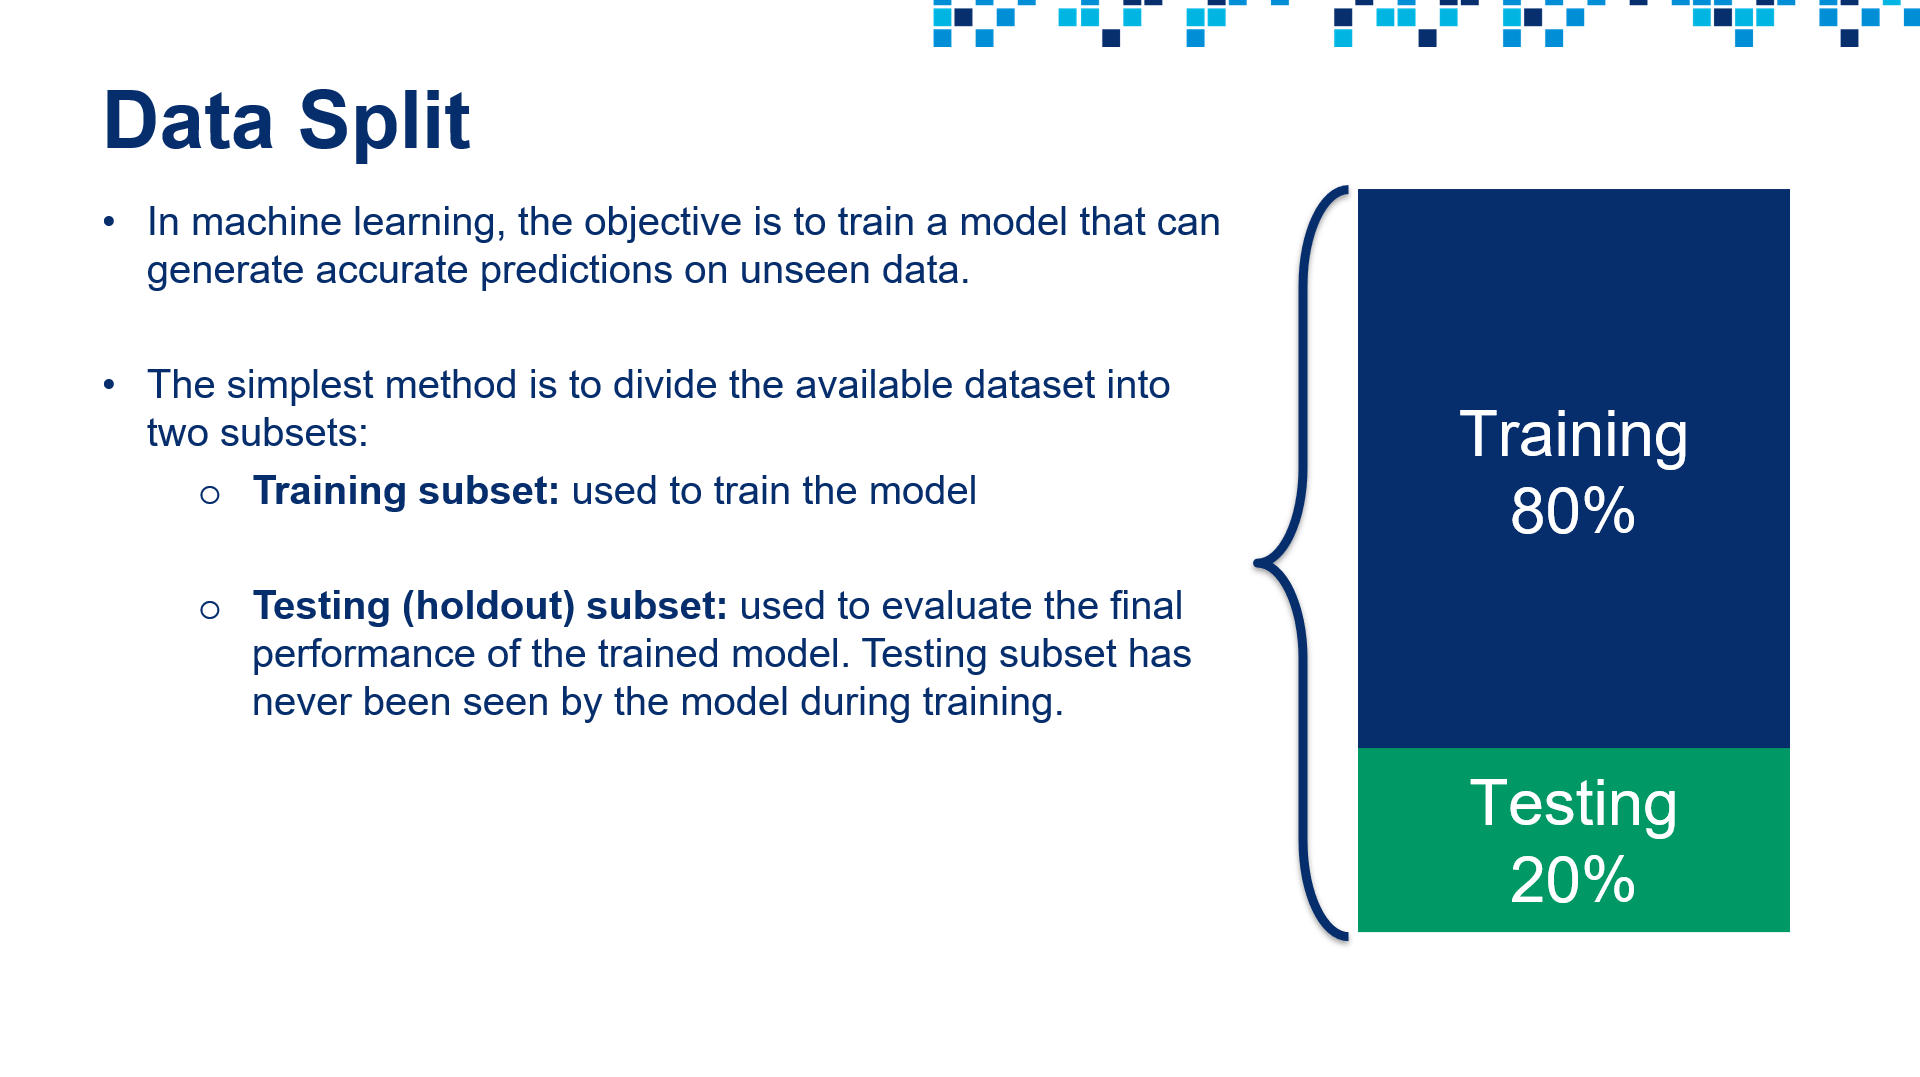

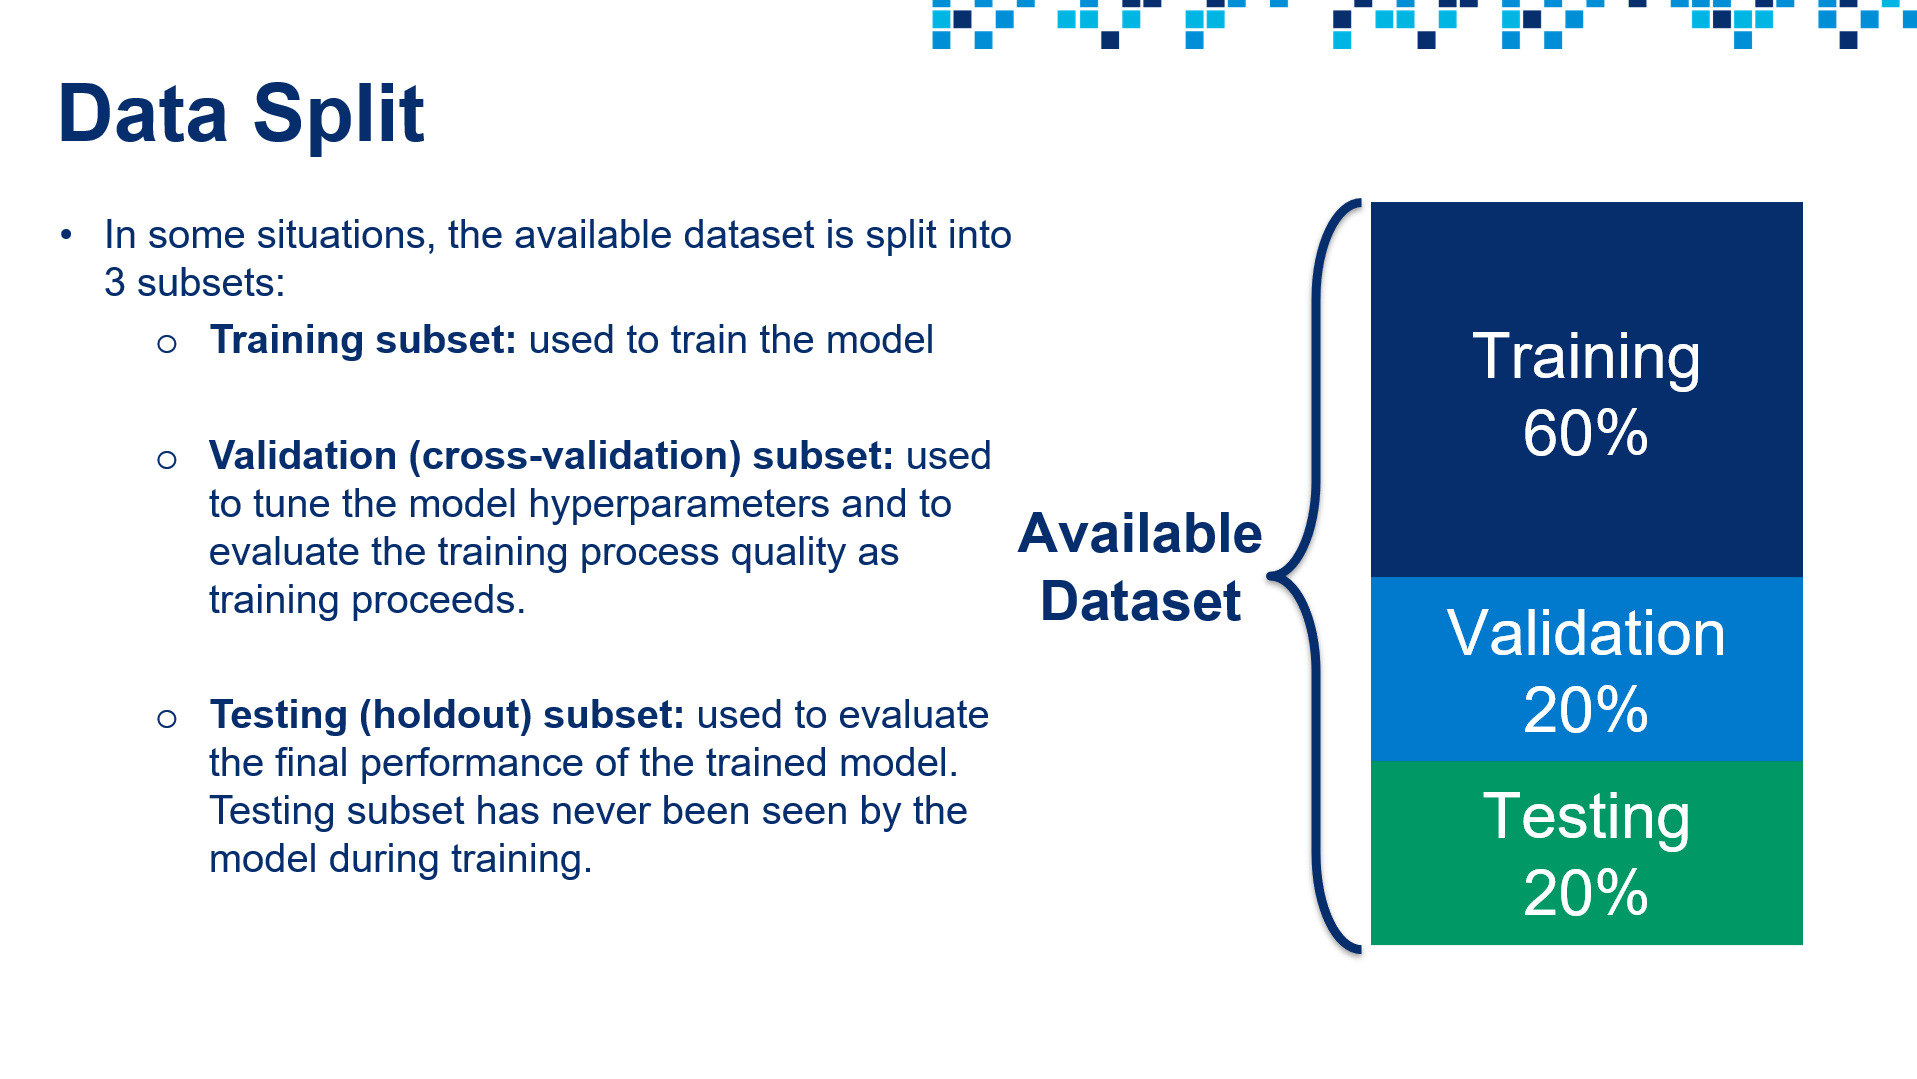

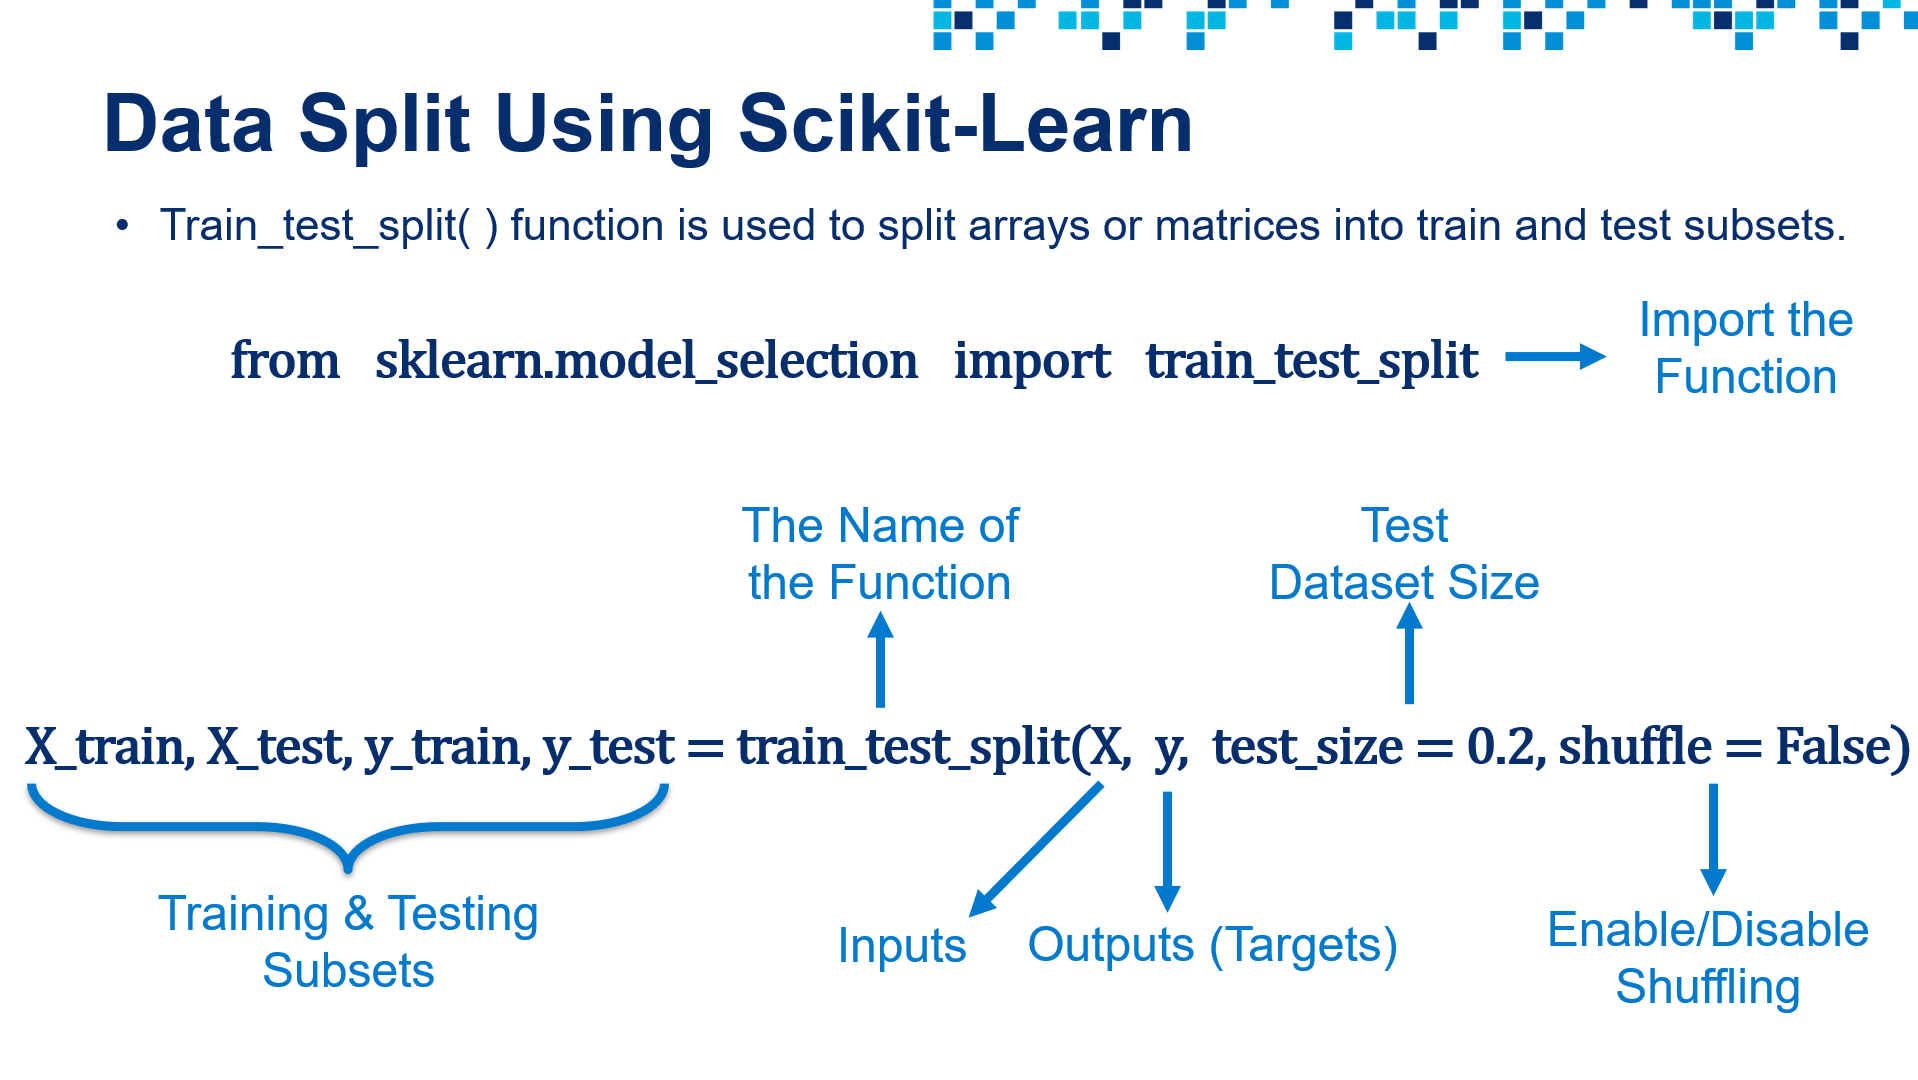

In [ ]:
# Split the data into inputs "X" and outputs "y"
X = apple_df.drop('% Change in Quarterly EPS (Target Output)', axis = 1)
y = apple_df['% Change in Quarterly EPS (Target Output)']

In [ ]:
# Let's view the inputs 
X

In [ ]:
# Let's view the outputs
y

In [ ]:
# Let's perform data train/test split
# Shuffling means randomly reordering the elements in the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [ ]:
# Check out the shape of input data after train/test split operation 
print(X_train.shape, X_test.shape)

In [ ]:
# Check out the shape of output data after train/test split operation 
print(y_train.shape, y_test.shape)

In [ ]:
# Display the training set 
# Note that no data shuffling took place because it has been disabled by setting "shuffle = False"
X_train

**PRACTICE OPPORTUNITY:** 
- **Using Scikit-Learn library, split the data into 30% for testing and 70% for training** 
- **Perform a sanity check by obtaining the shape of the training and testing datasets**
- **Enable shuffling and rerun the code. Comment on your results.**

# TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

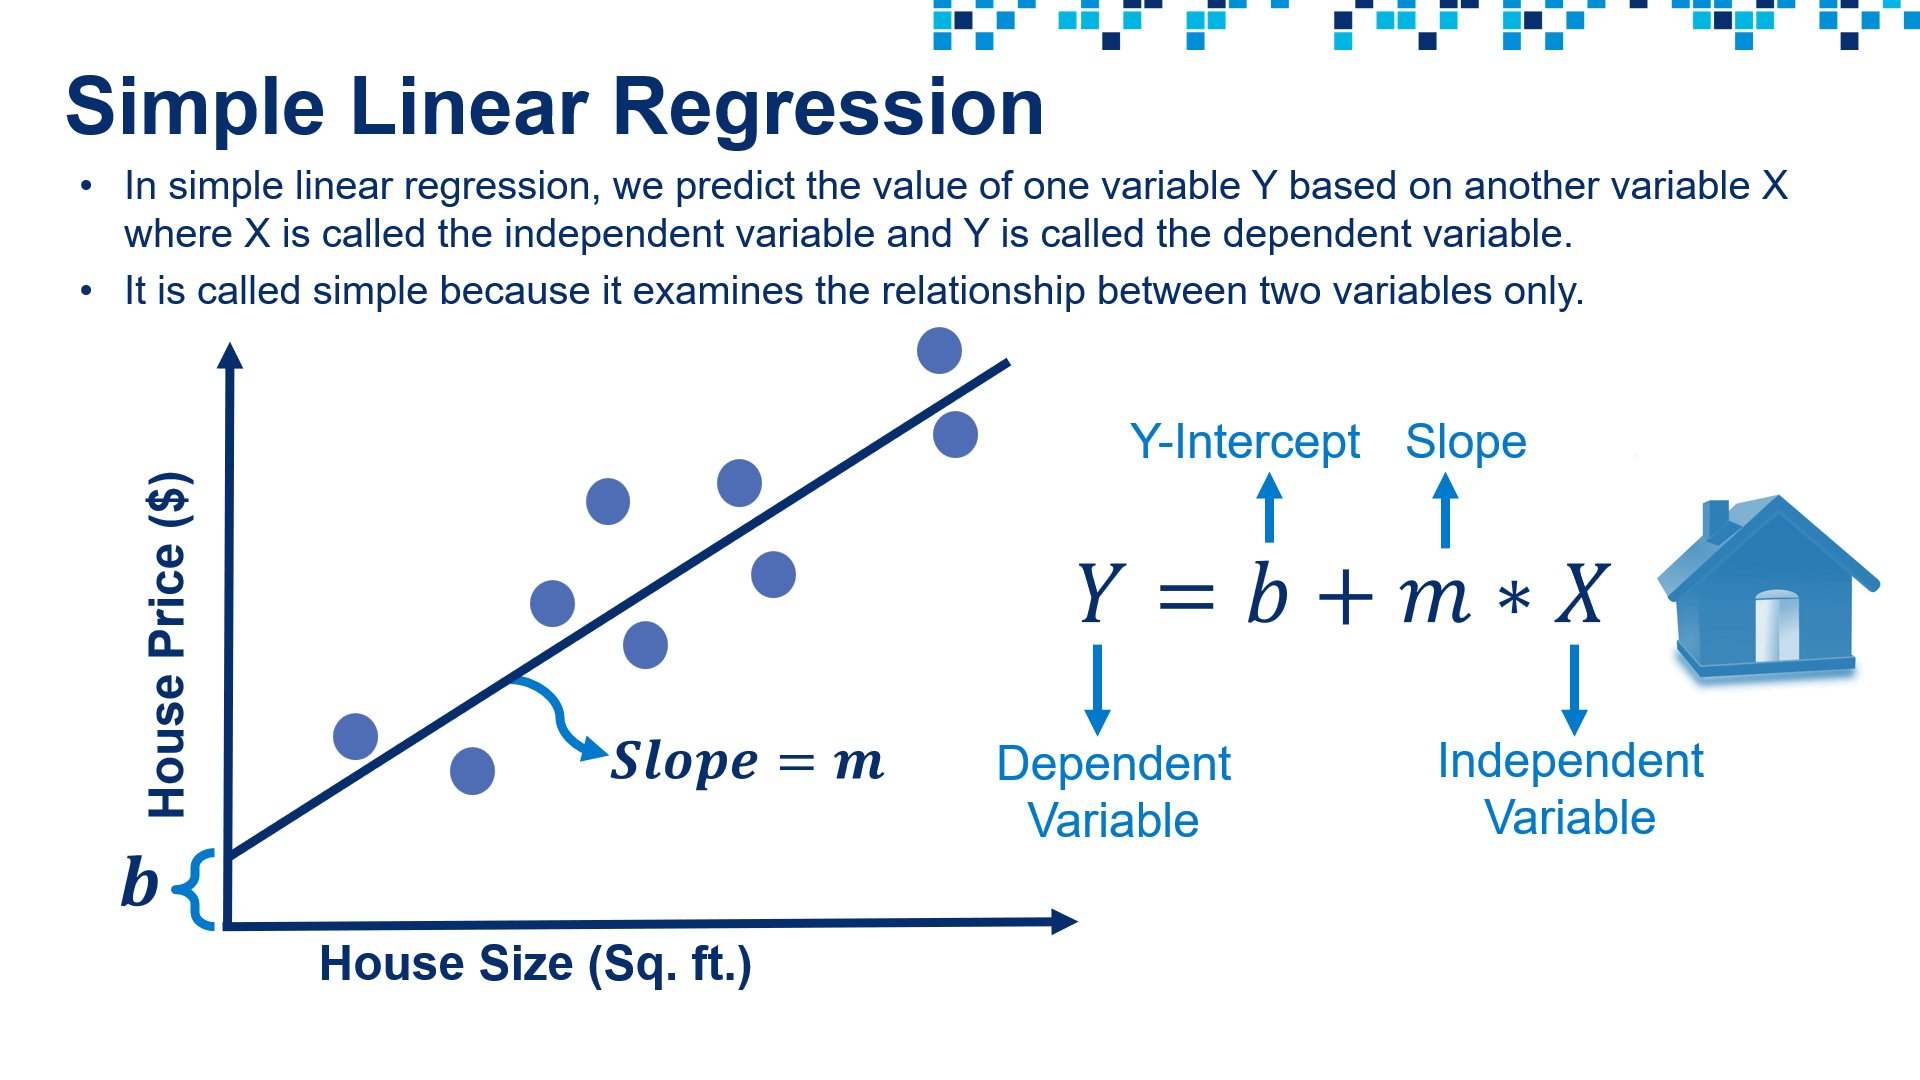

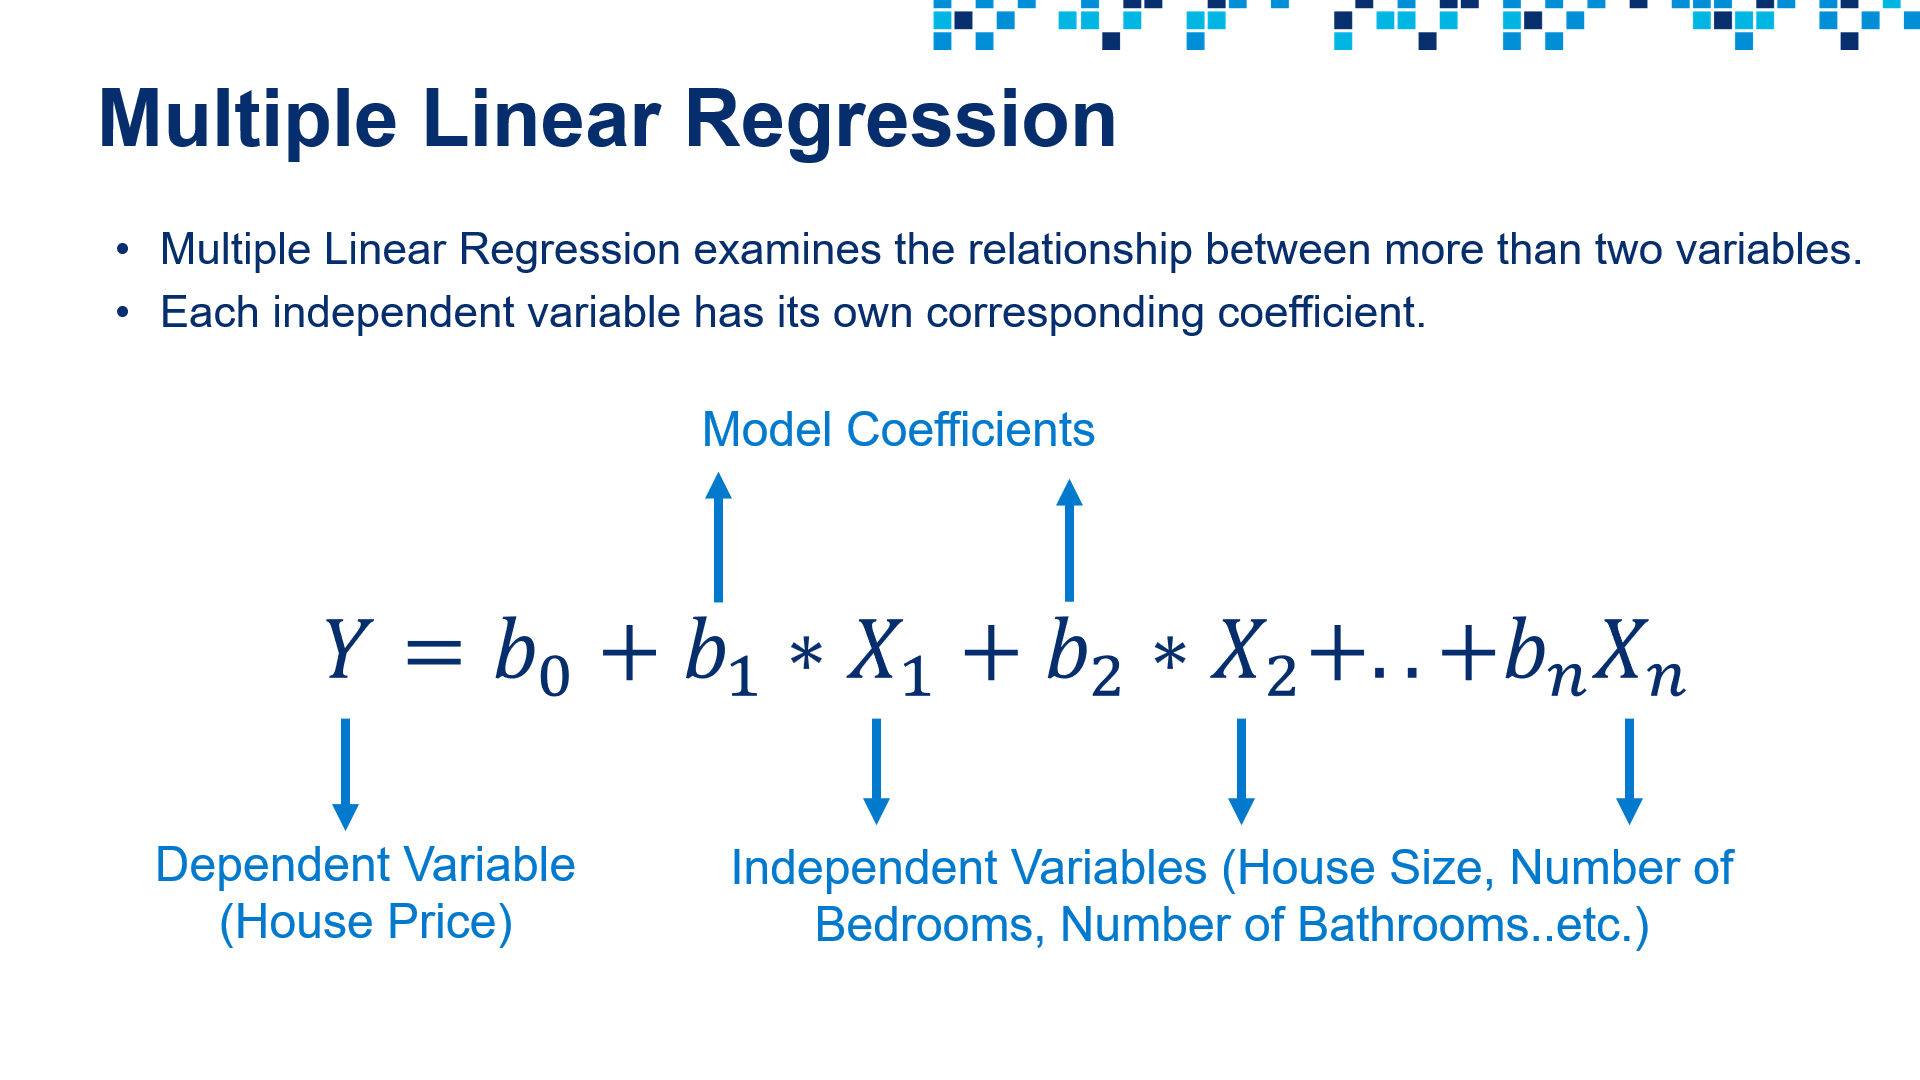

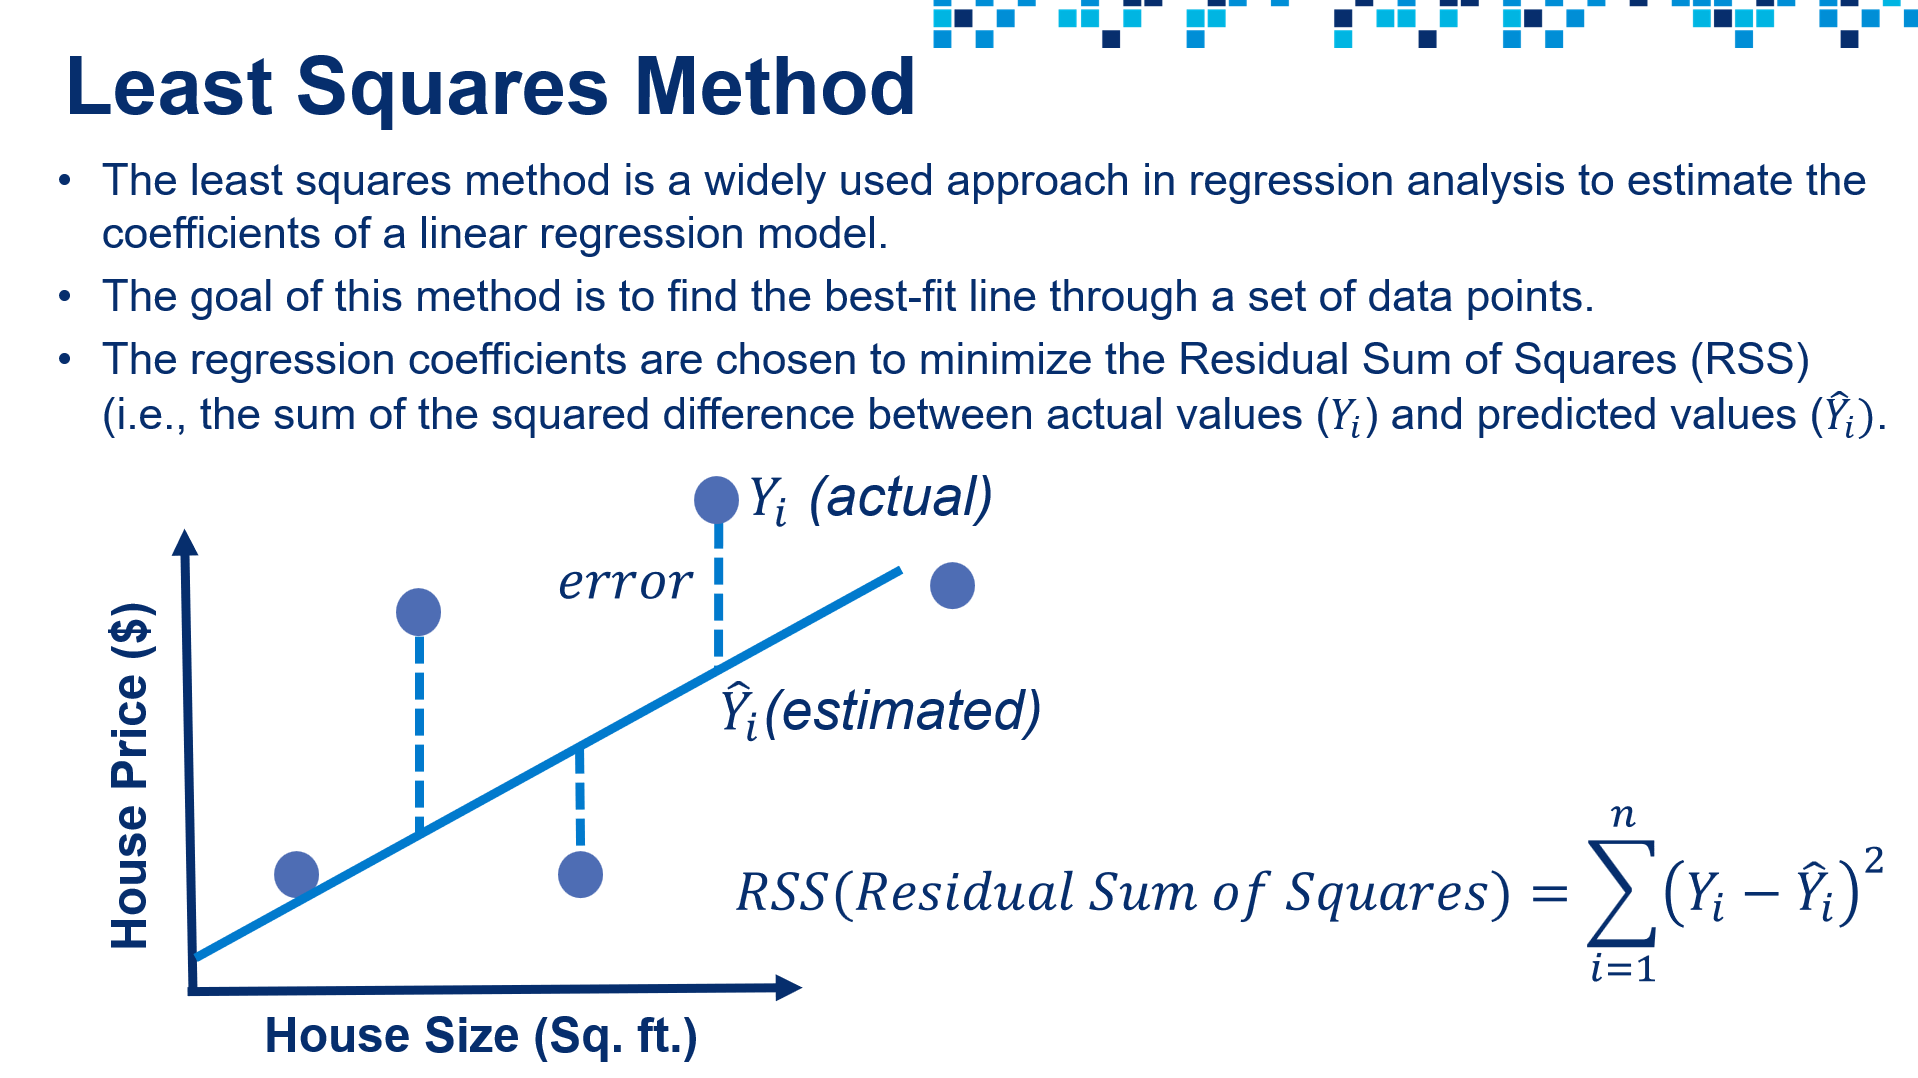

In [ ]:
# Import linear_model from Scikit-Learn Library 
from sklearn import linear_model

# Train a linear regression model using Scikit-Learn Library
# First we instantiate an object out of our linear_model class
# Then we apply the fit() method to fit the model to the training dataset (X_train, y_trian)
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(X_train, y_train)

In [ ]:
# After the regression model is trained, we evaluate its performance on the testing dataset
# Note that the testing dataset has never been seen by the model during training
# Now we can compare y_predict vs. the actual output y_test (ground truth data)
y_predict = linear_regression_model.predict(X_test)

In [ ]:
# Let's generate various regression metrics by comparing "y_predict" to actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

In [ ]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

In [ ]:
# Display the trained model Y-intercept
print(linear_regression_model.intercept_)

# Display the estimated coefficients for the linear regression problem
print(linear_regression_model.coef_)

**PRACTICE OPPORTUNITY:** 
- **Set the fit_intercept attribute to False, retrain the multiple linear regression model and evaluate its performance**
- **Display the estimated coefficients and Y-intercept. What do you conclude?**
- **Hint: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html**

# TRAIN AND EVALUATE A RANDOM FOREST ALGORITHM

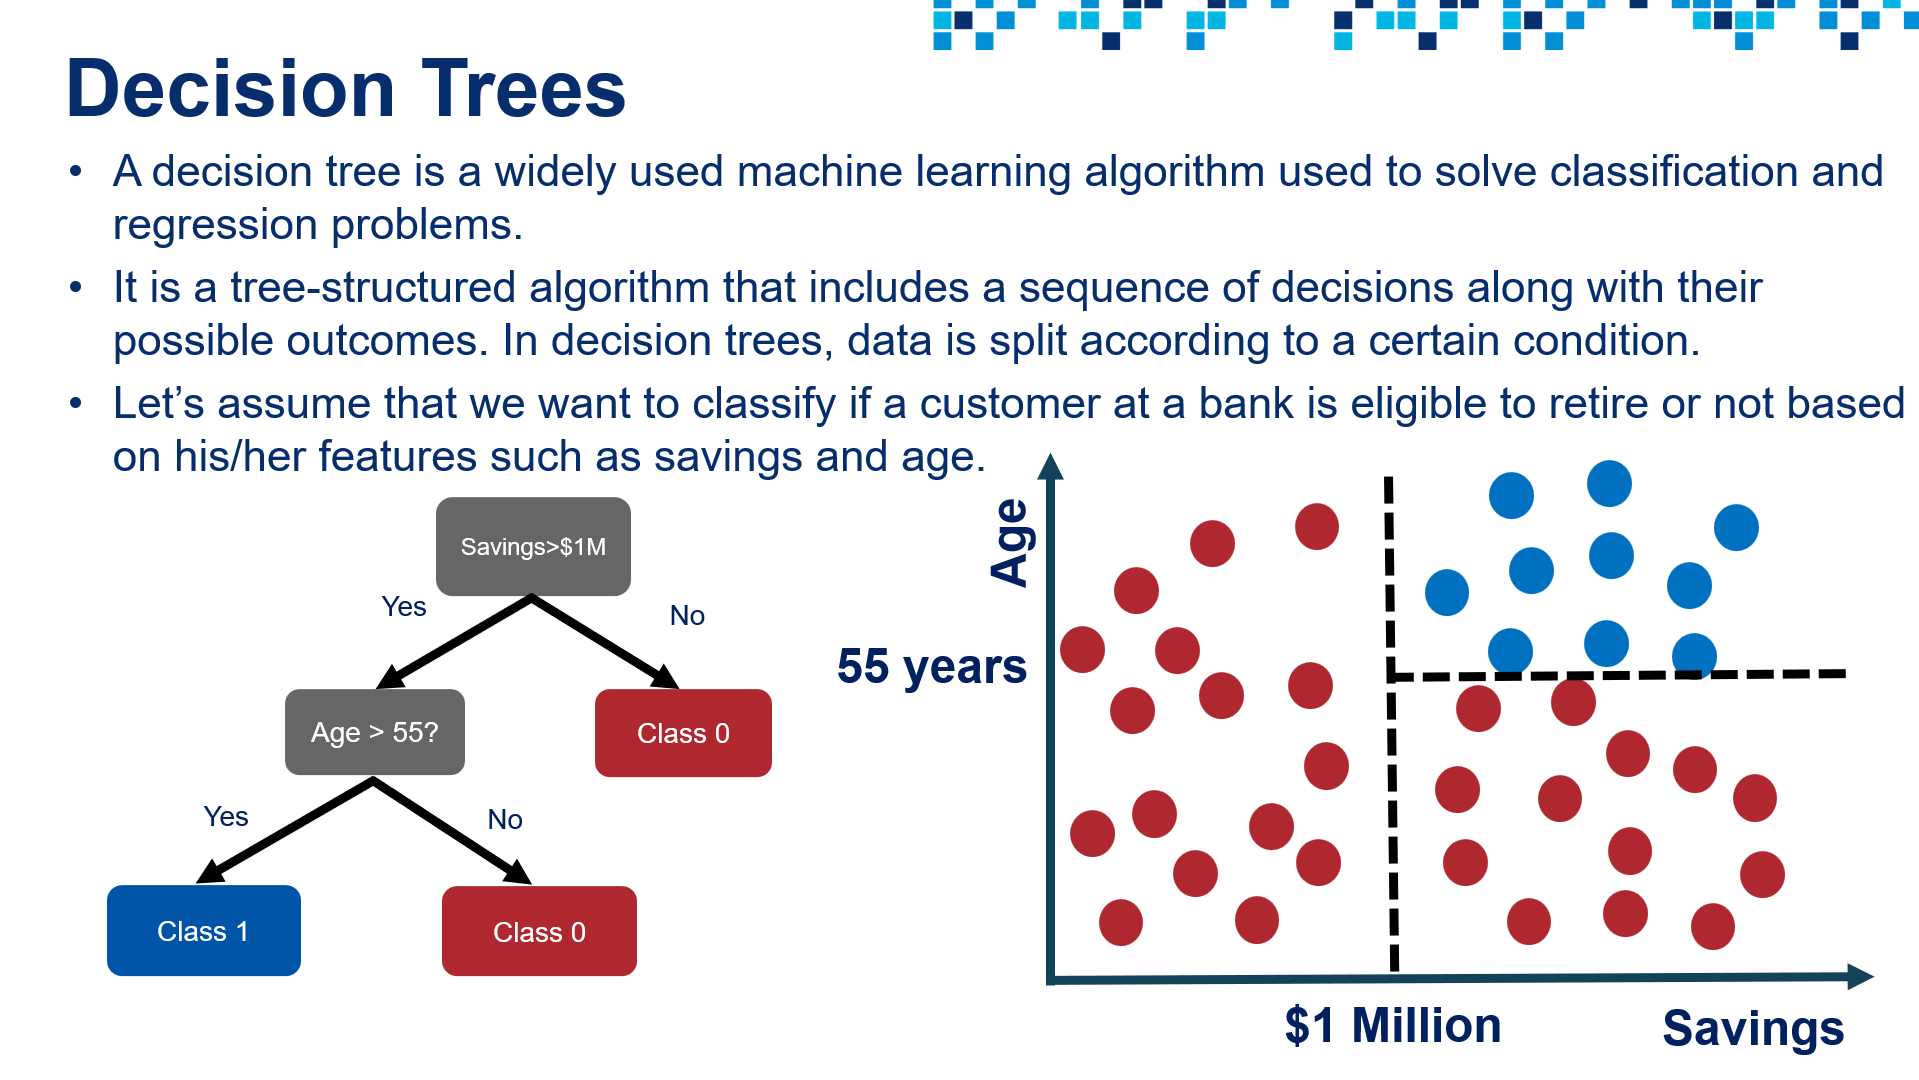

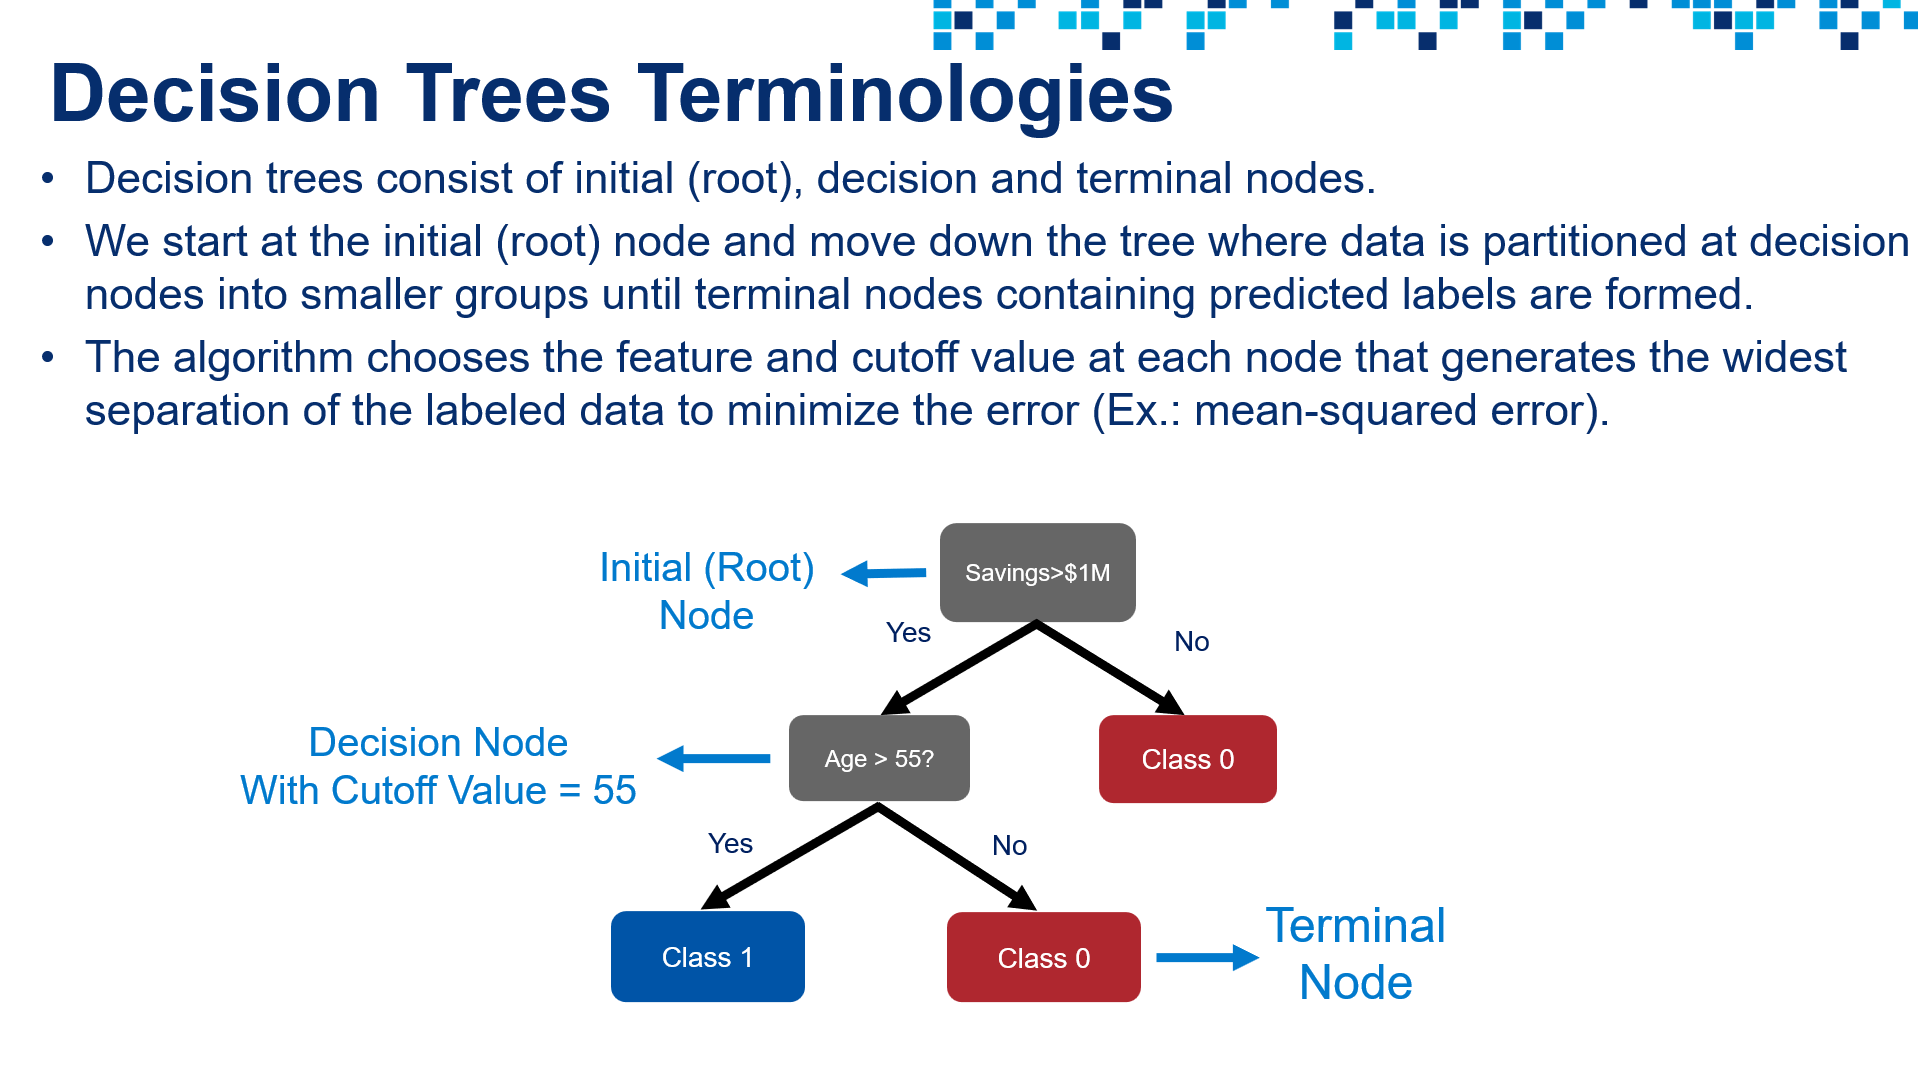

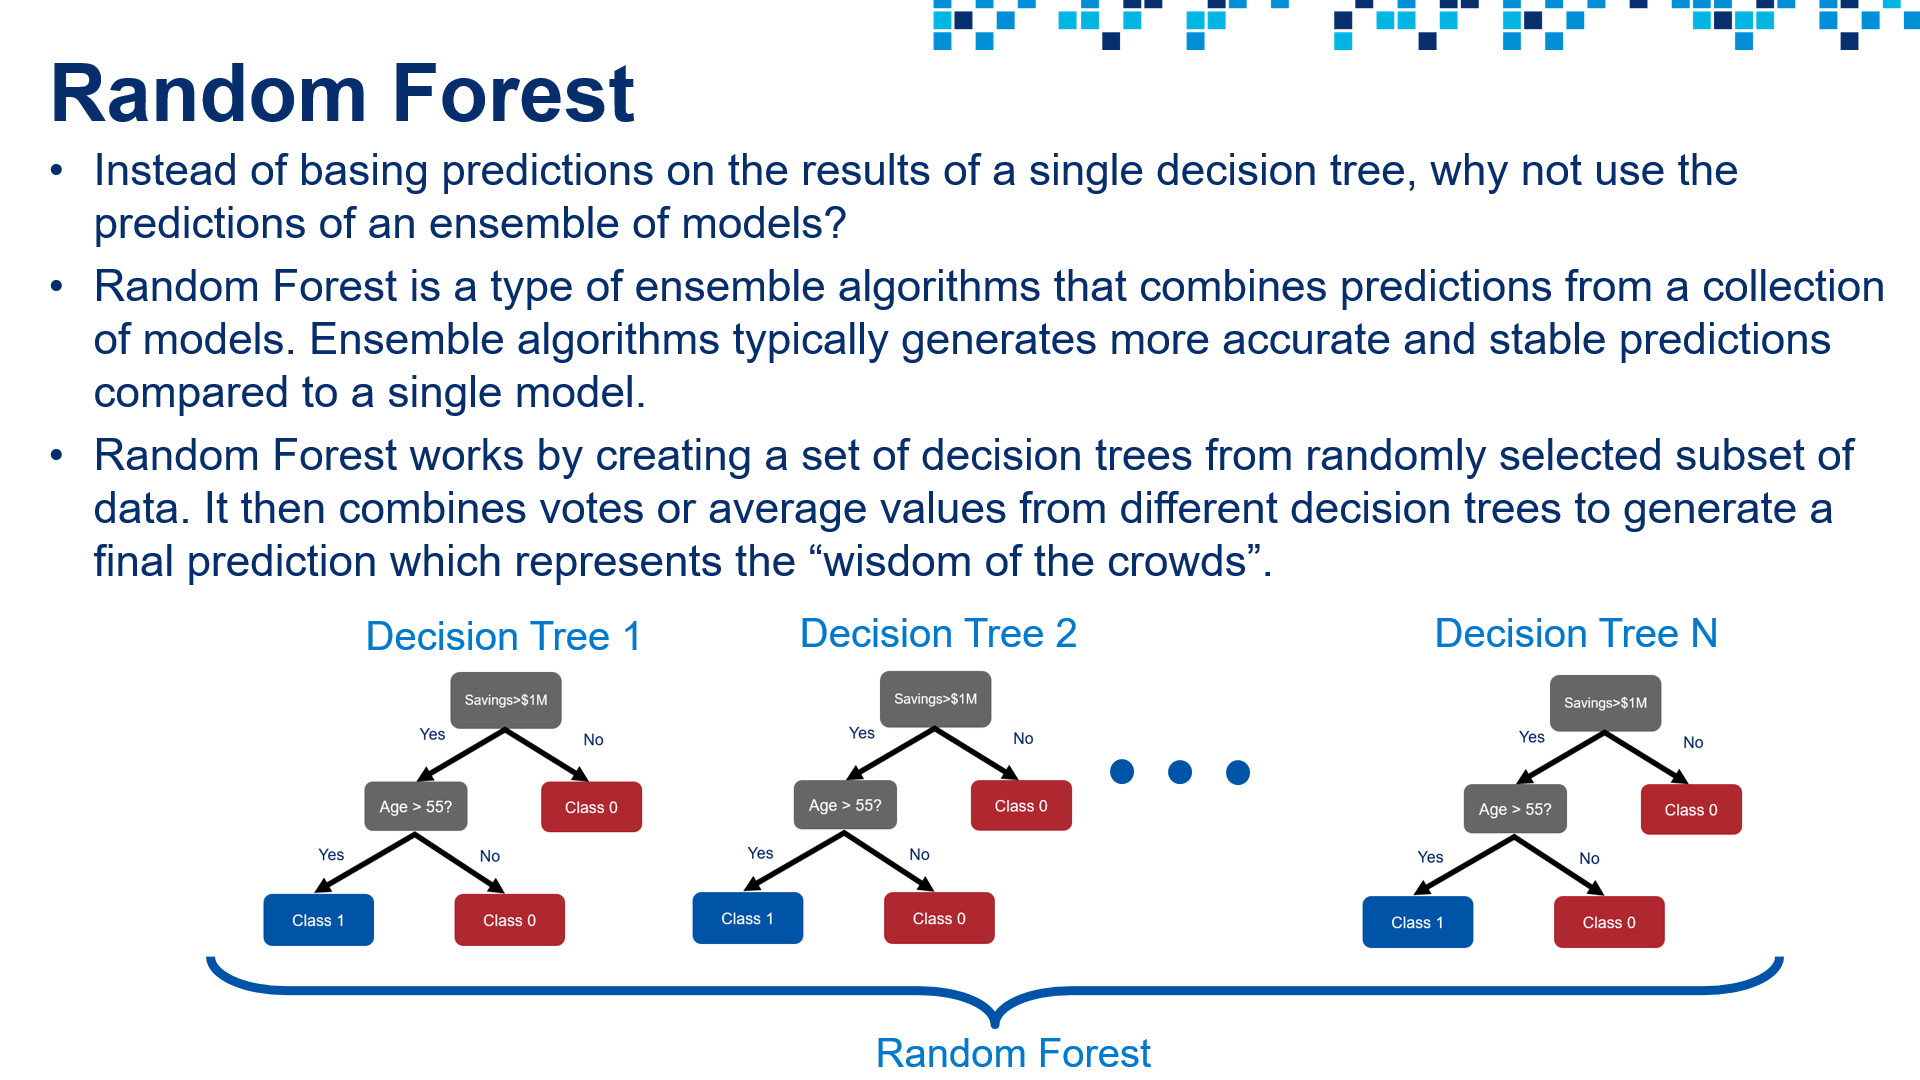

In [ ]:
# Import Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regression model
# n_estimators: represents the number of trees in the forest
# max_depth: represents the maximum depth of the tree
random_forest_model = RandomForestRegressor(n_estimators = 5, max_depth = 10);
random_forest_model.fit(X_train, y_train);

In [ ]:
# Evaluate trained Random Forest Regression model
y_predict = random_forest_model.predict(X_test)

In [ ]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

In [ ]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

**PRACTICE OPPORTUNITY:** 
- **Increase the maximum depth of the tree by setting max_depth = 100** 
- **Retrain the Random Forest Regression model and evaluate its performance**

# UNDERSTAND THE INTUITION BEHIND ARTIFICIAL NEURAL NETWORKS AND DEEP LEARNING

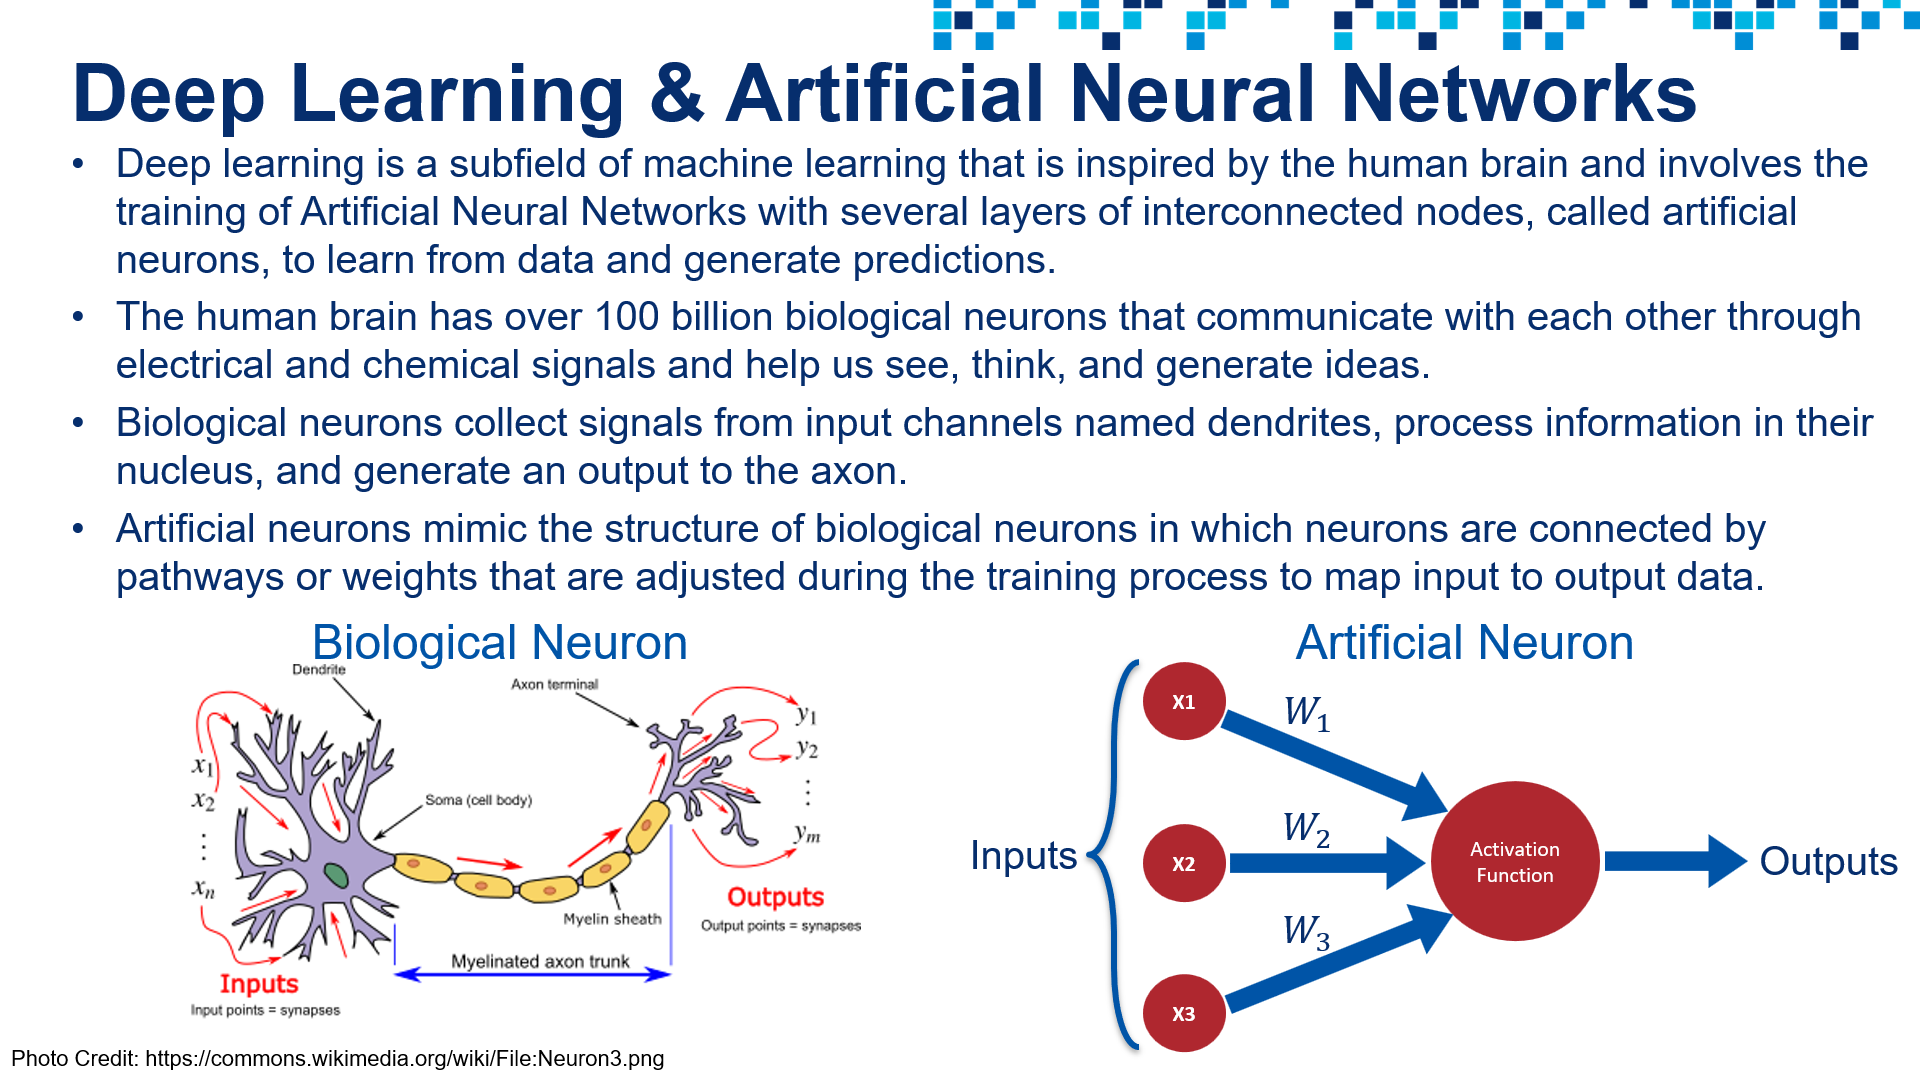

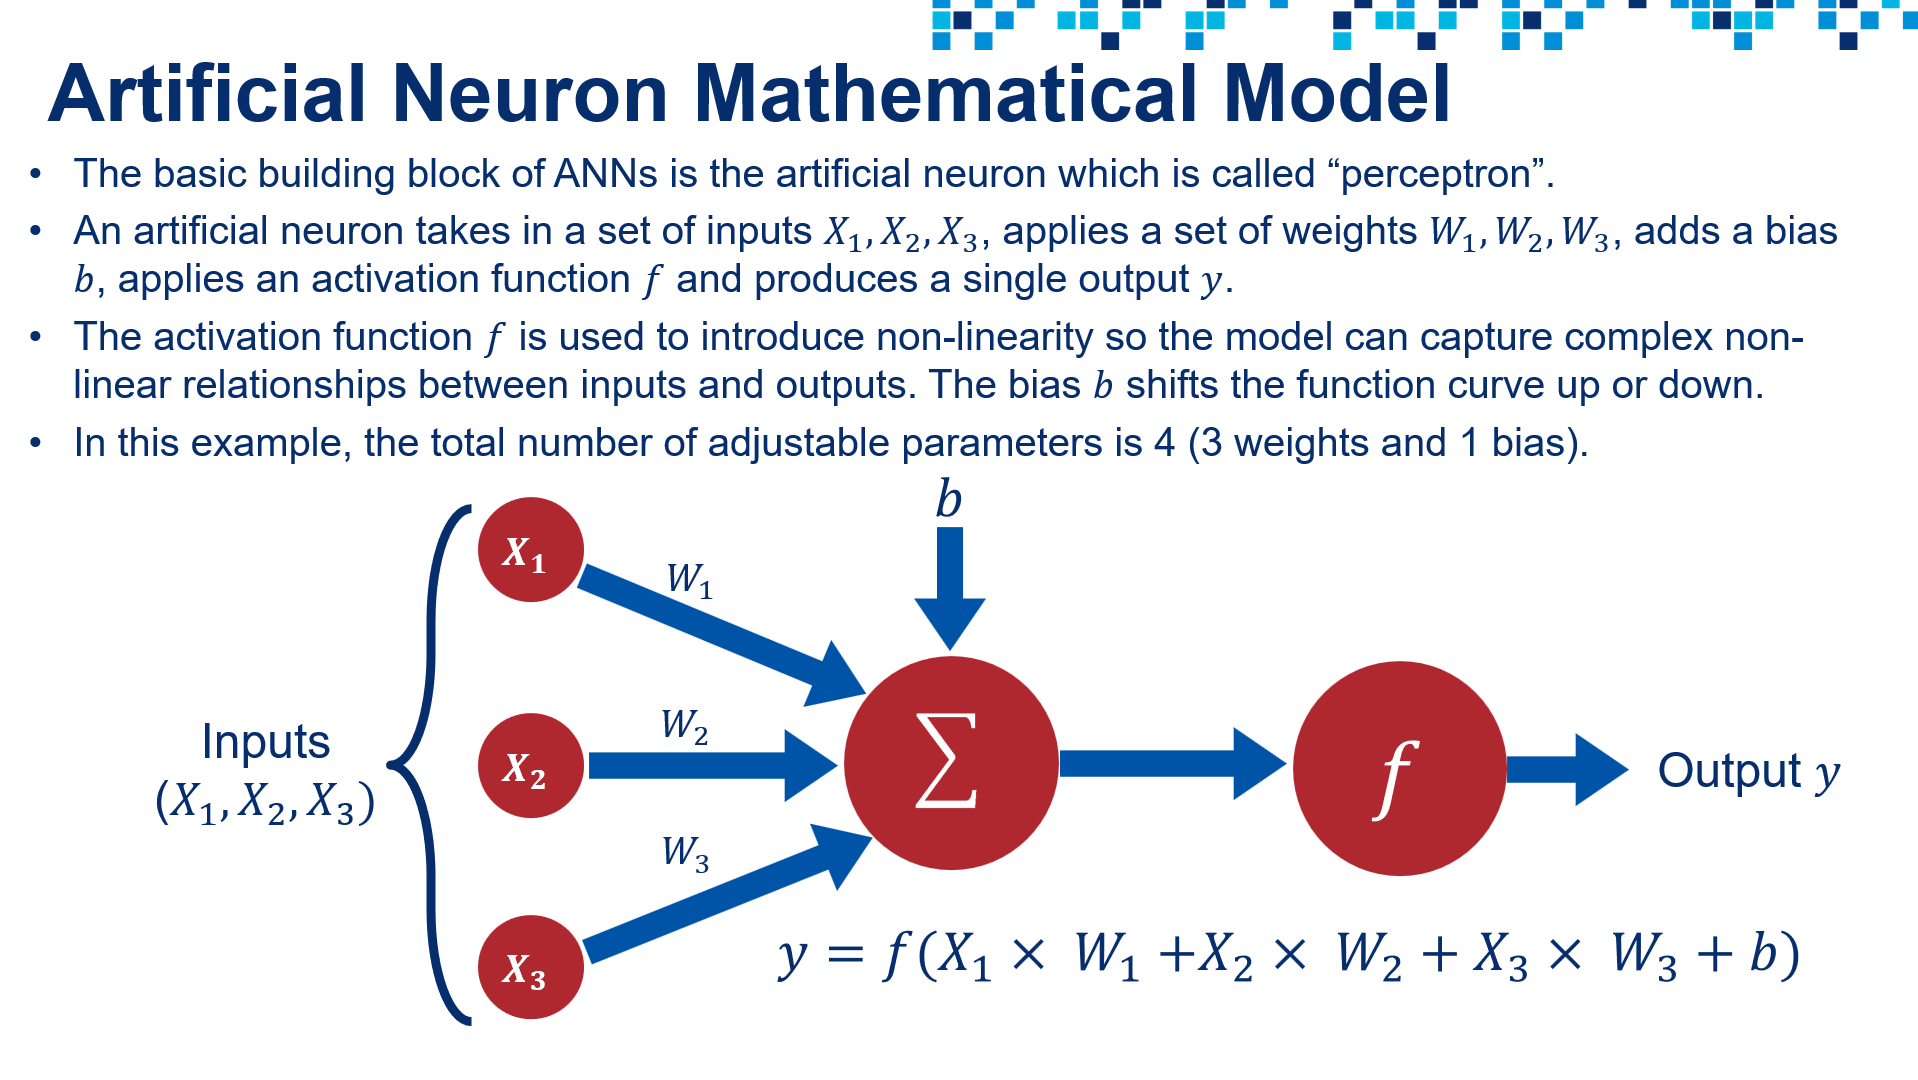

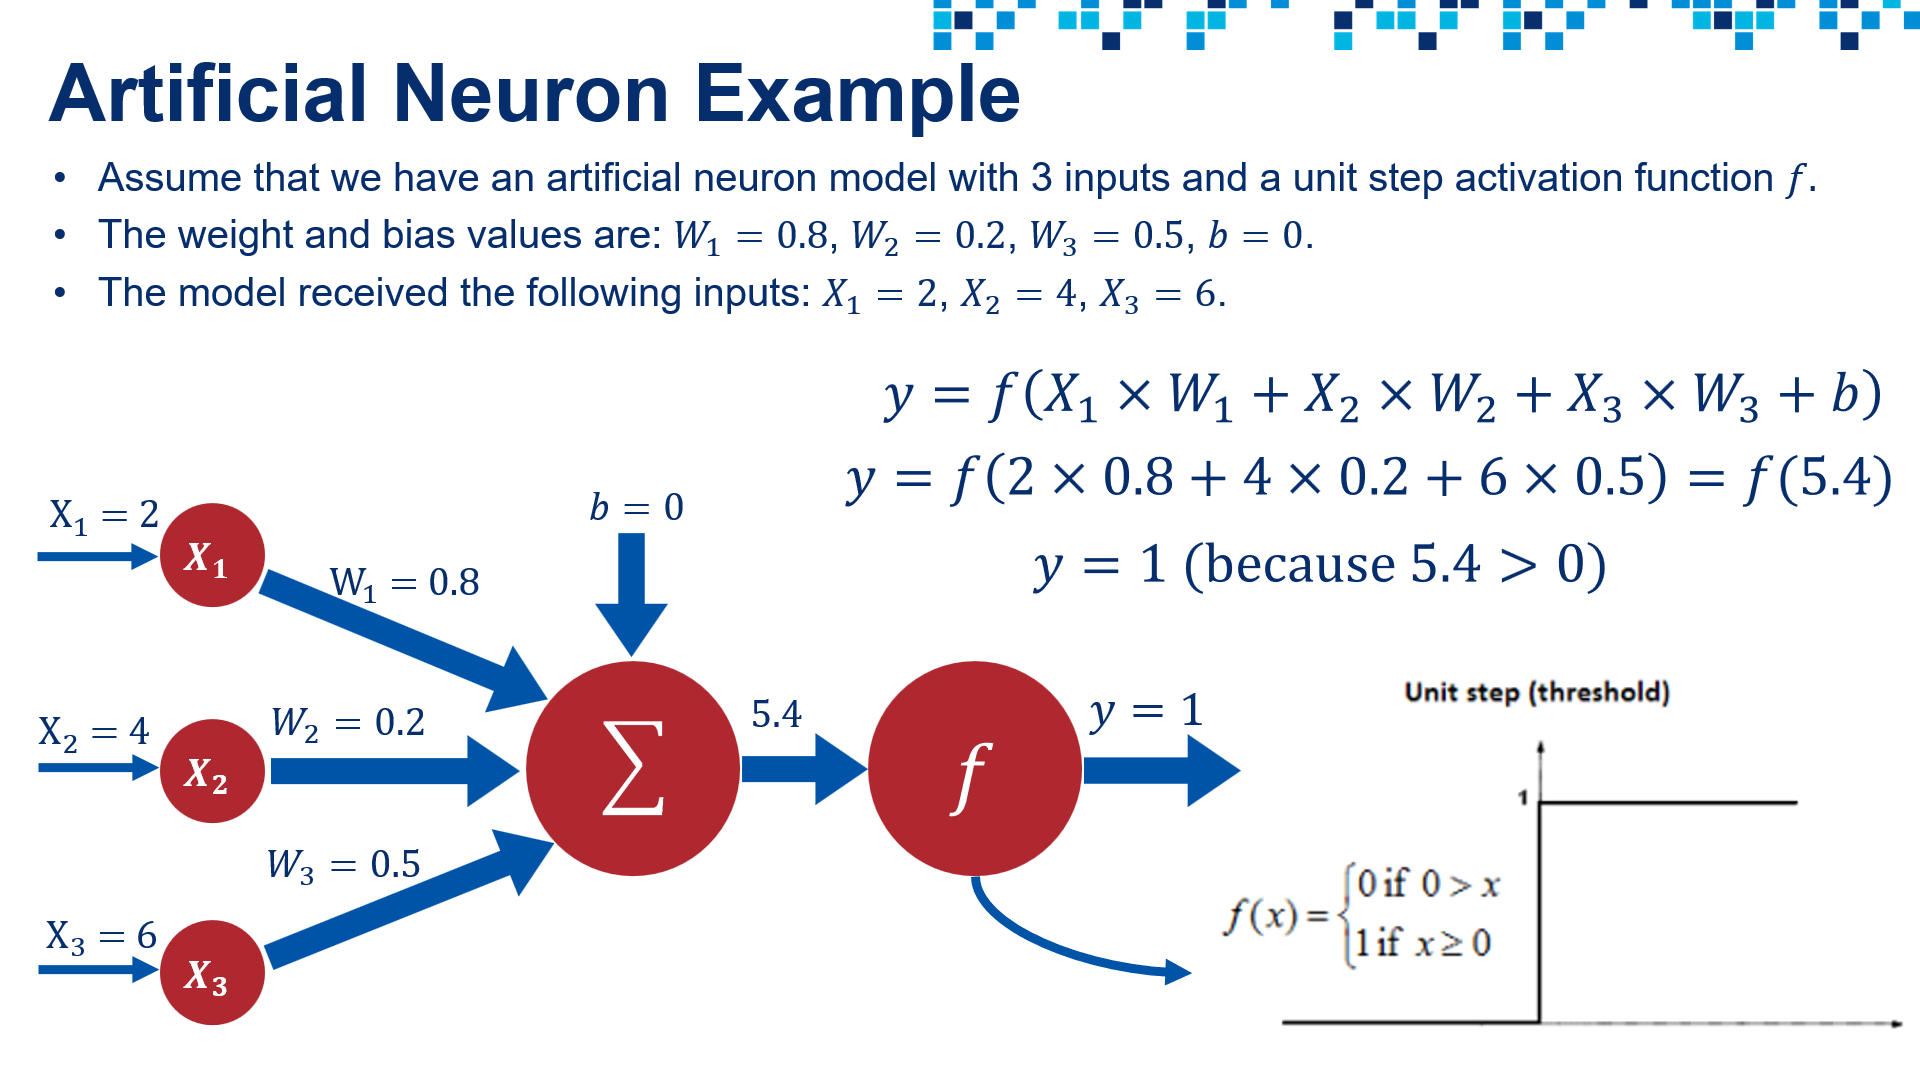

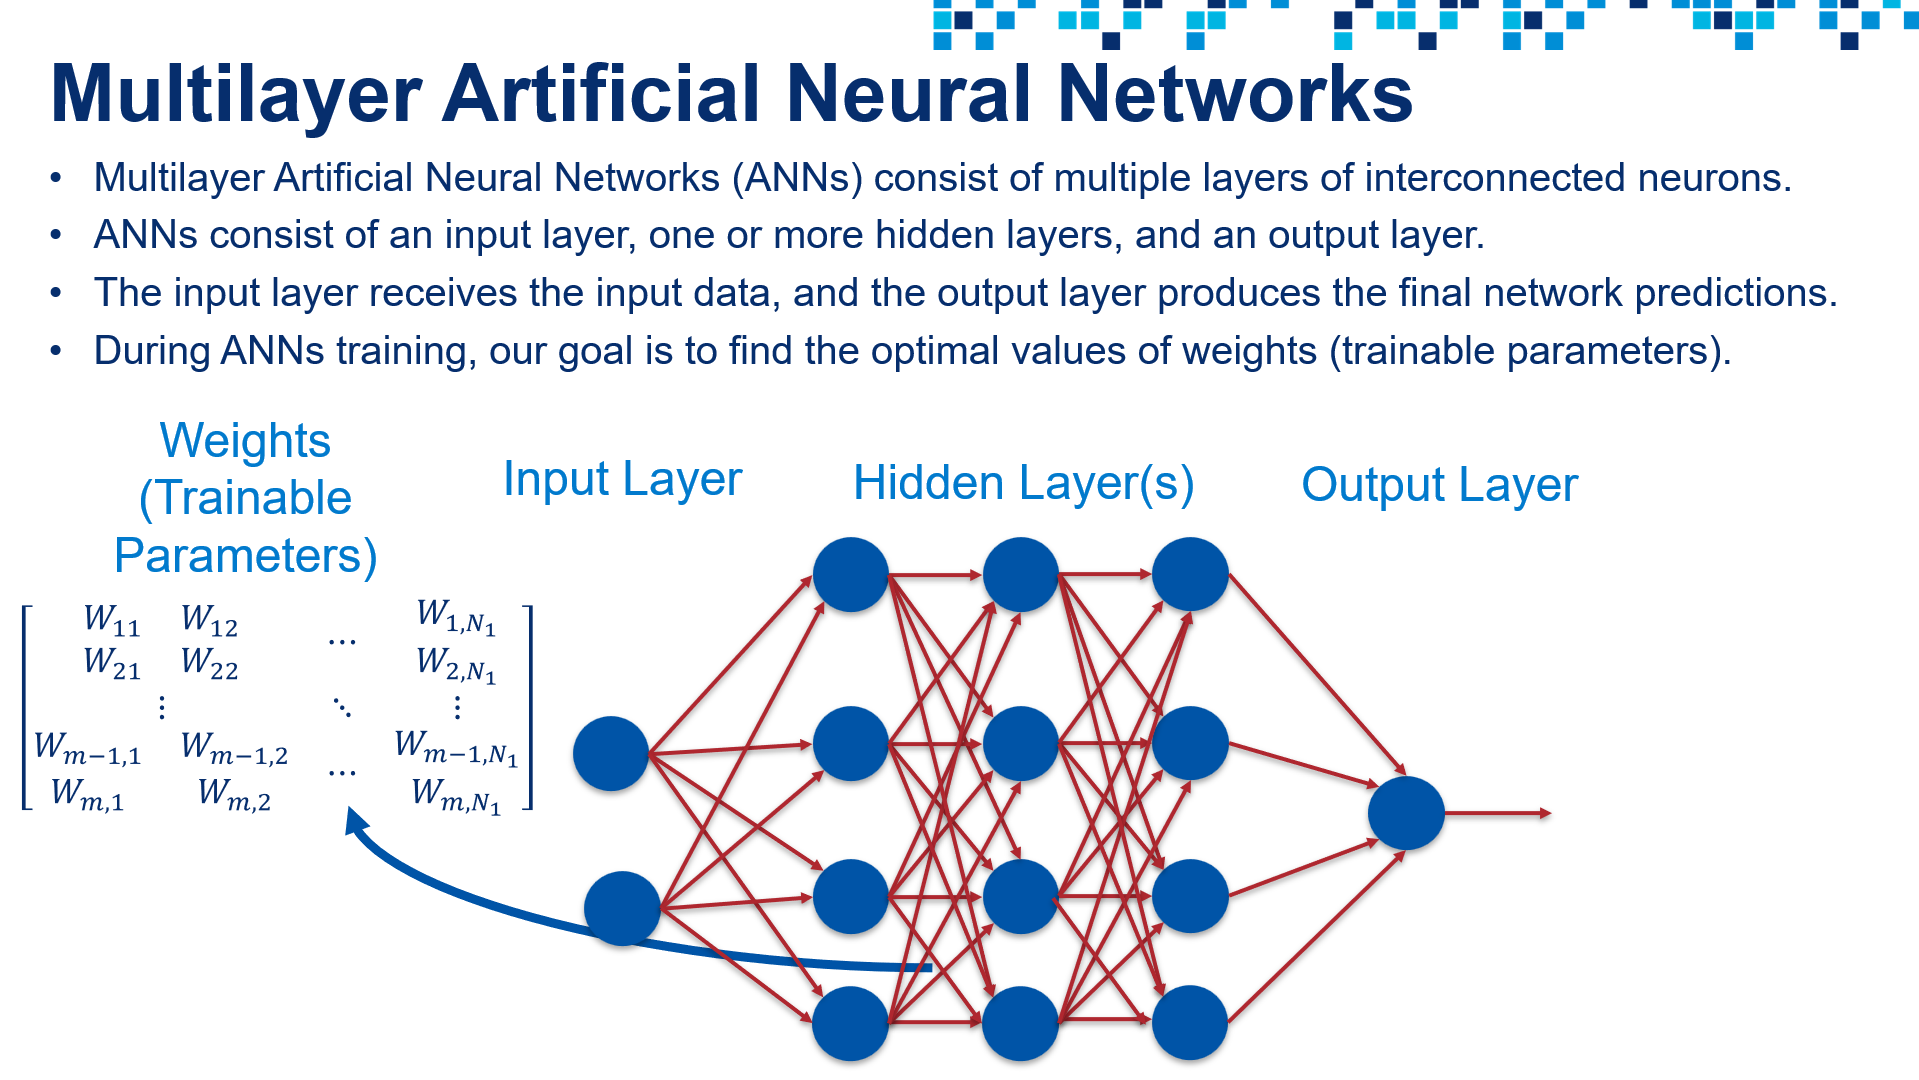

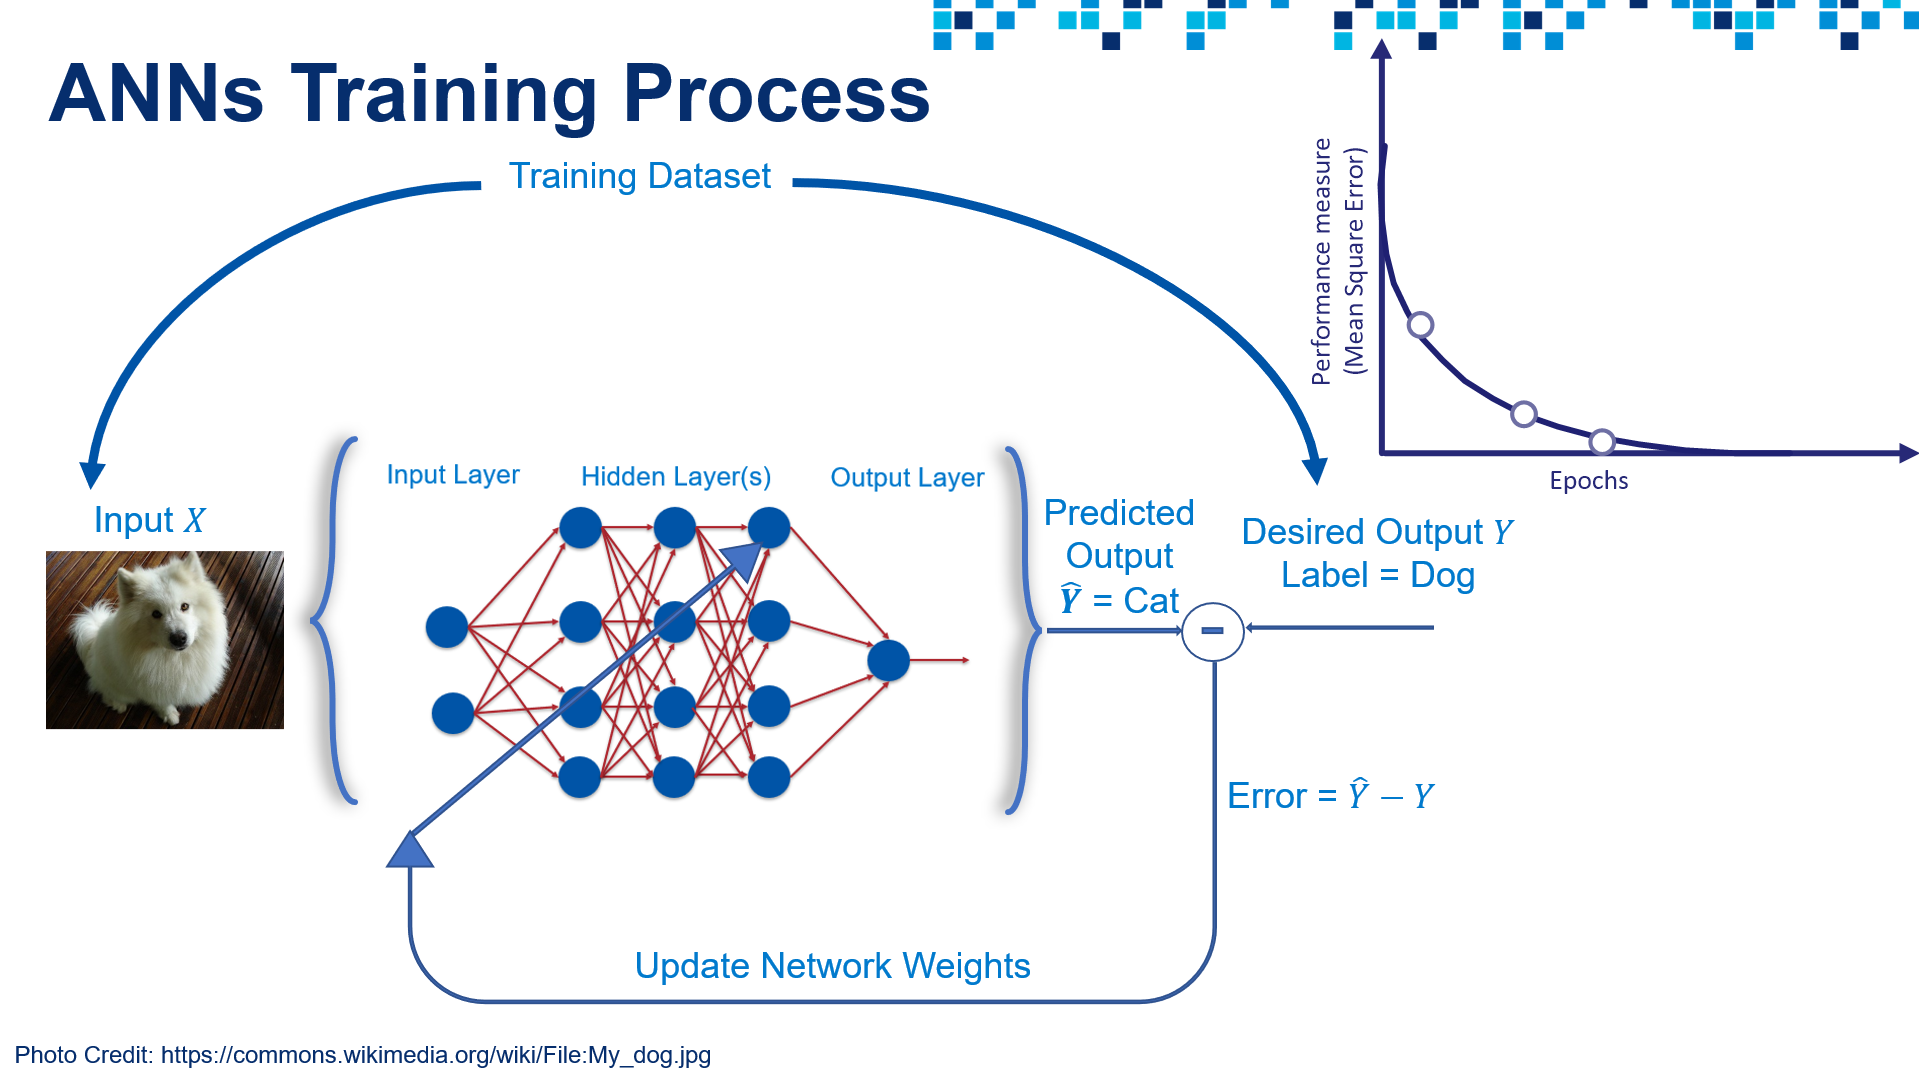

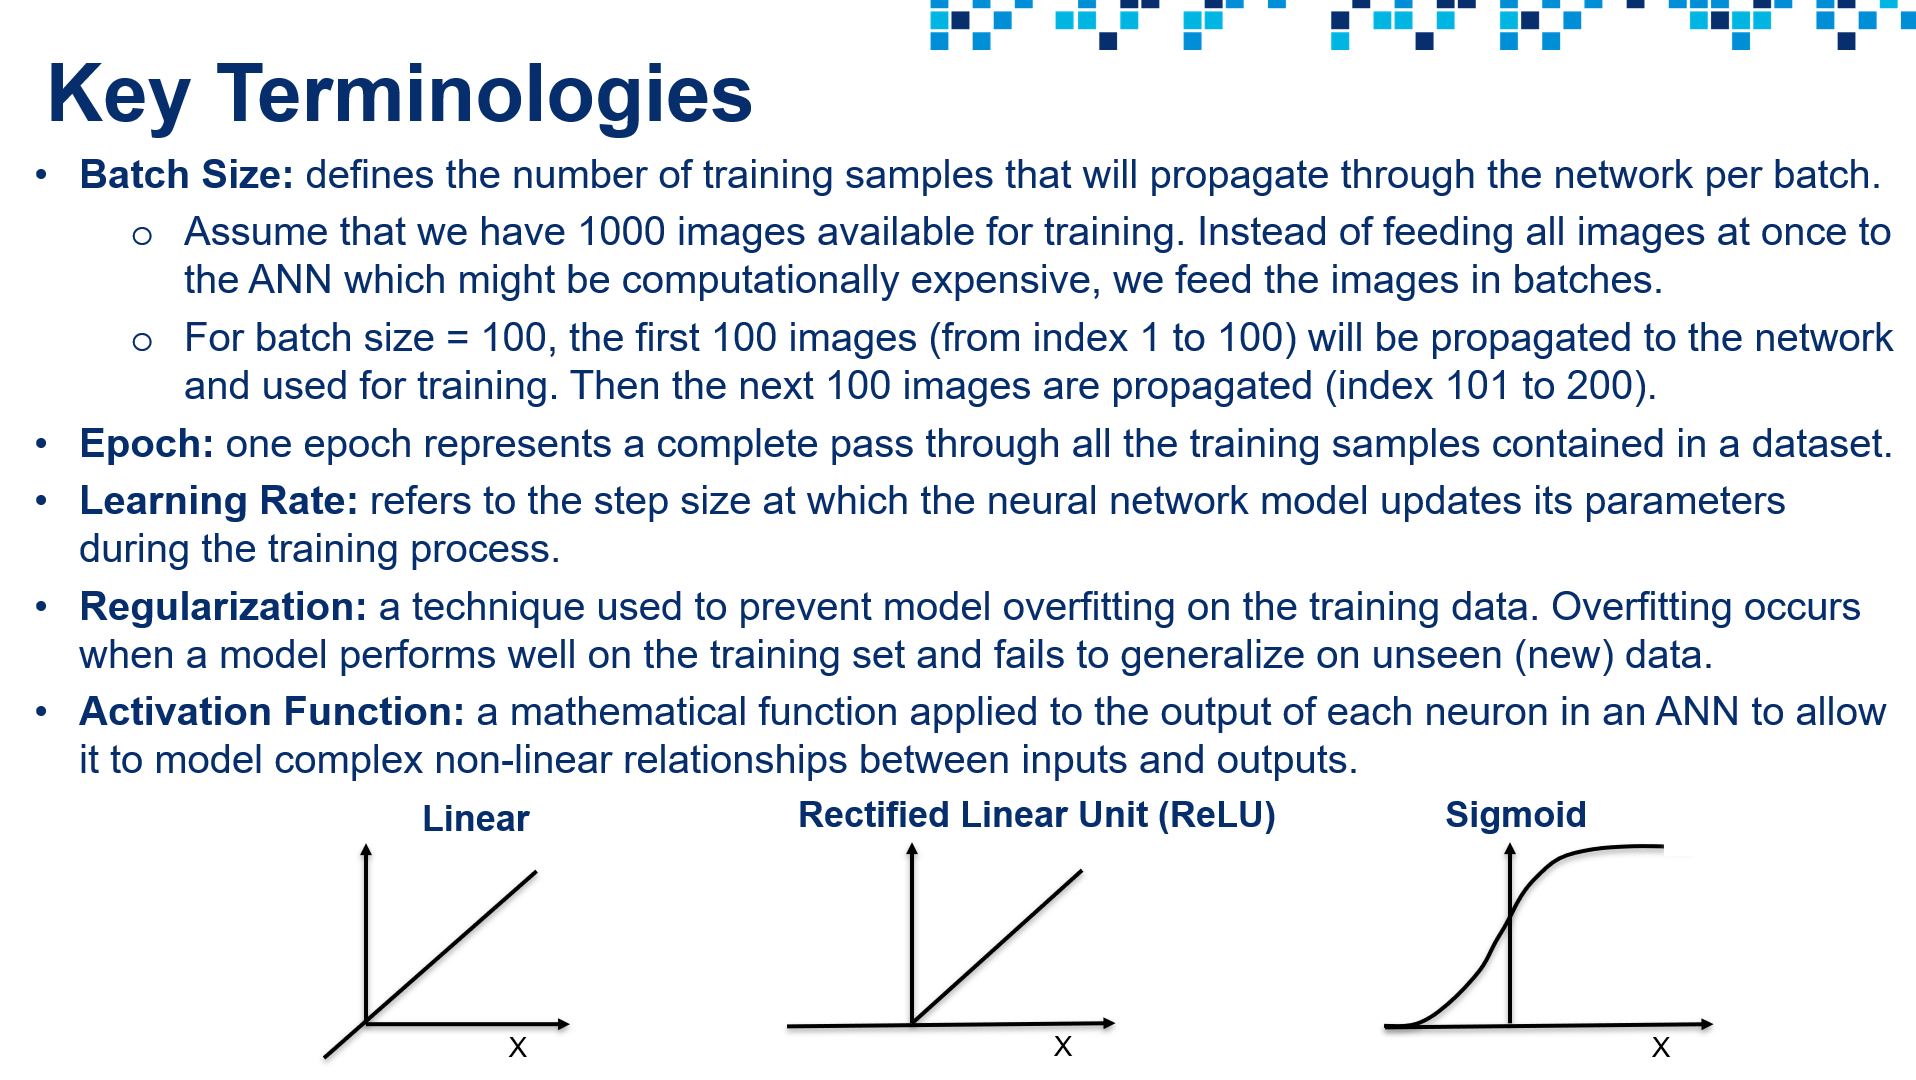

- TensorFlow is a free open-source library developed by Google and used for machine learning and artificial intelligence models building, training and testing.
- Google Tensorflow Playground offers an interactive tool to visualize artificial neural networks: https://playground.tensorflow.org/

**PRACTICE OPPORTUNITY:** 
- **Using Google Tensorflow Playground, perform the following tasks:** 
    - **Select the spiral dataset and set the ratio of the training to test data to 70%/30%**
    - **Set the noise level to 20 and the batch size to 15**
    - **Choose an Artificial Neural Network with one hidden layer that contains 6 neurons and set the activation function to Rectified Linear Unit (ReLU). Train the model and record the training and test loss after 5000 epochs.**   
    - **Modify the architecture of the Artificial Neural Network by adding 3 hidden layers with 8 neurons each. Retrain the model and record the training and test loss after 1000 epochs.**
    - **Assess both networks performance and comment on your results**

# TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK TO SOLVE REGRESSION PROBLEMS

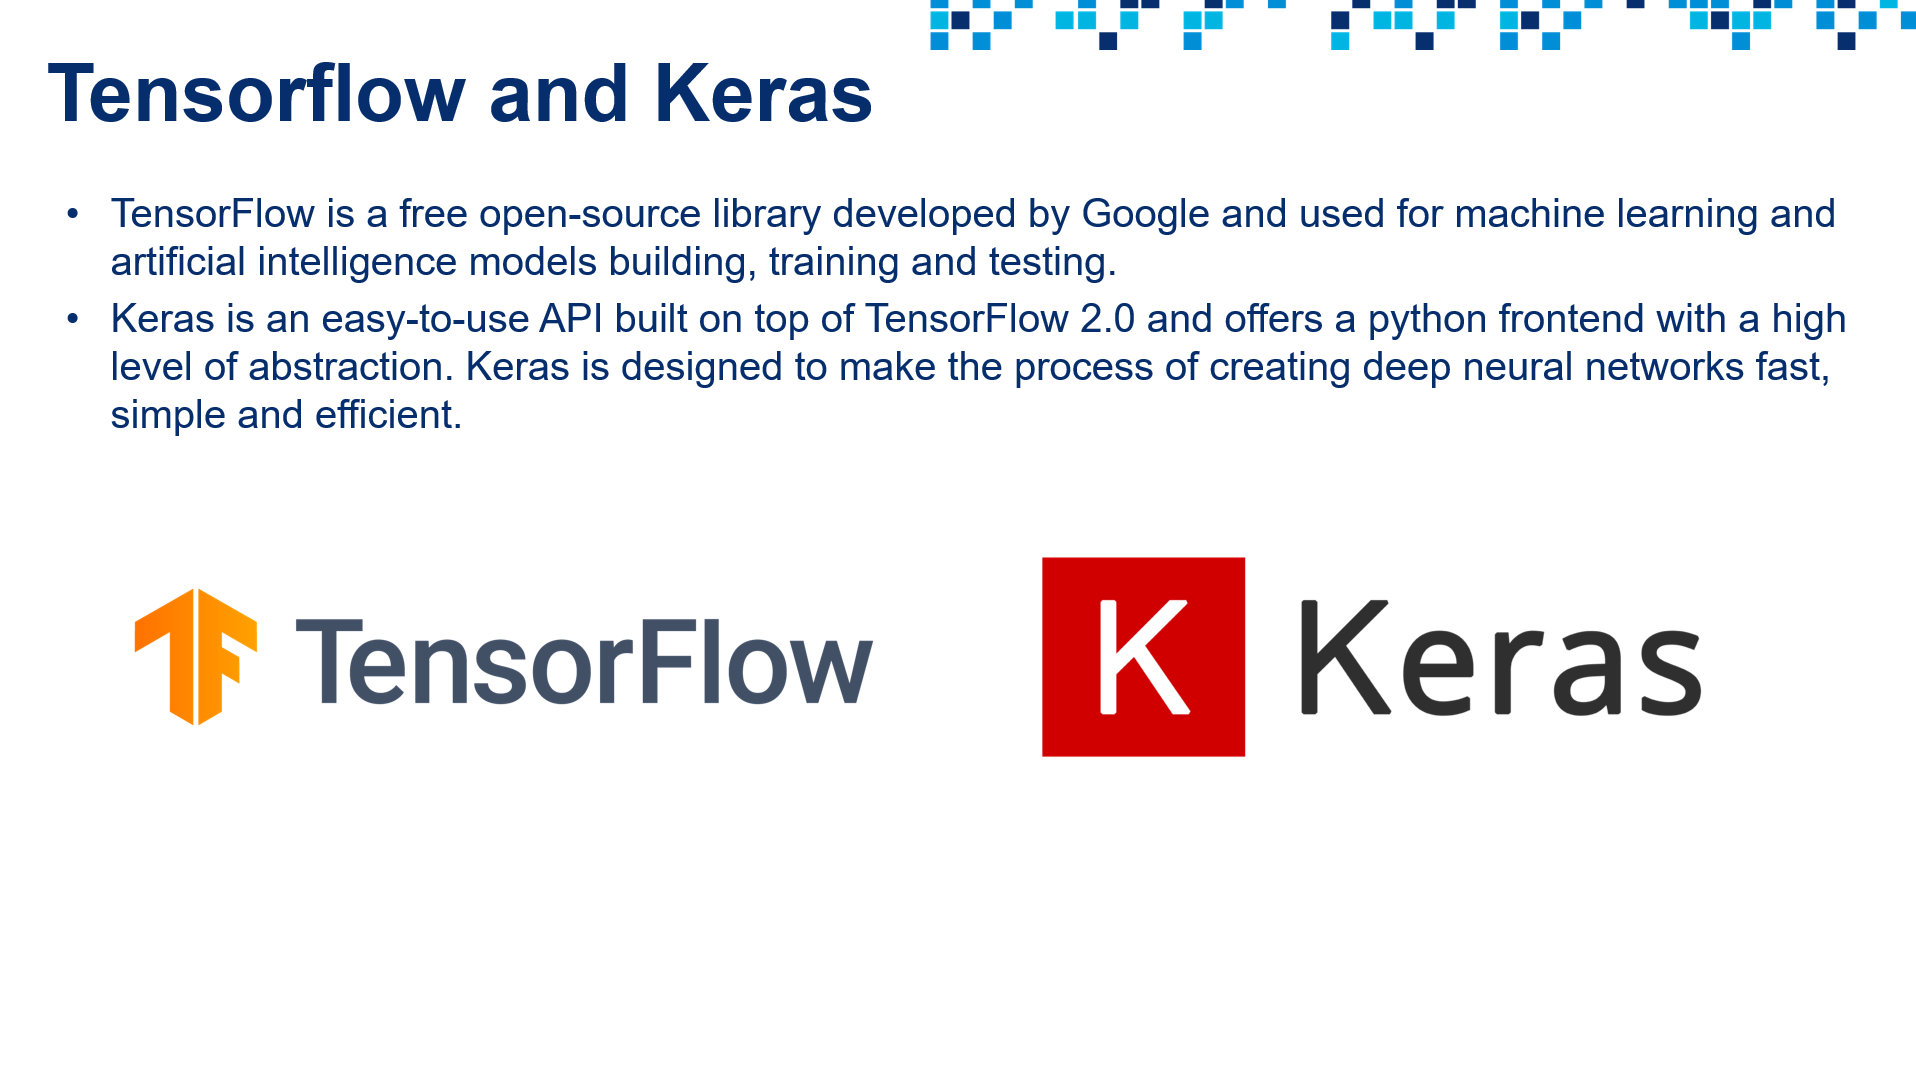

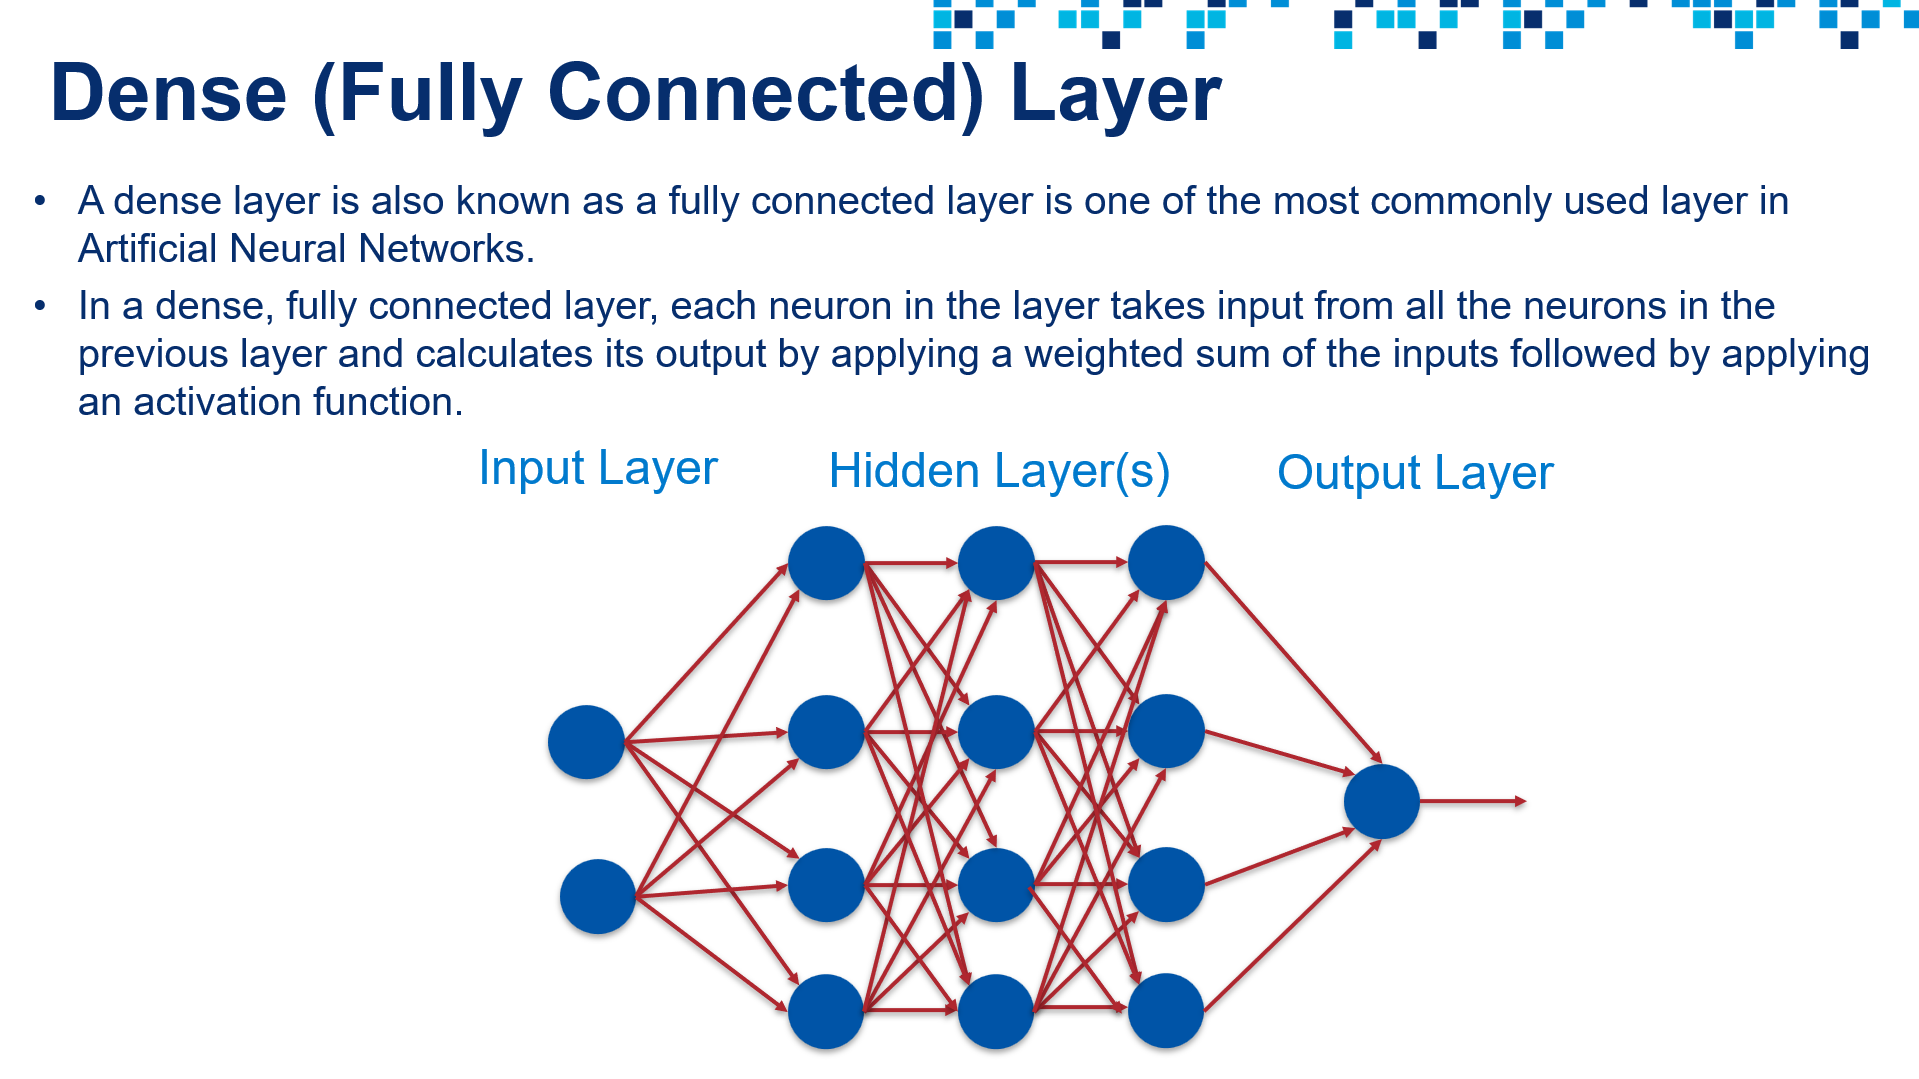

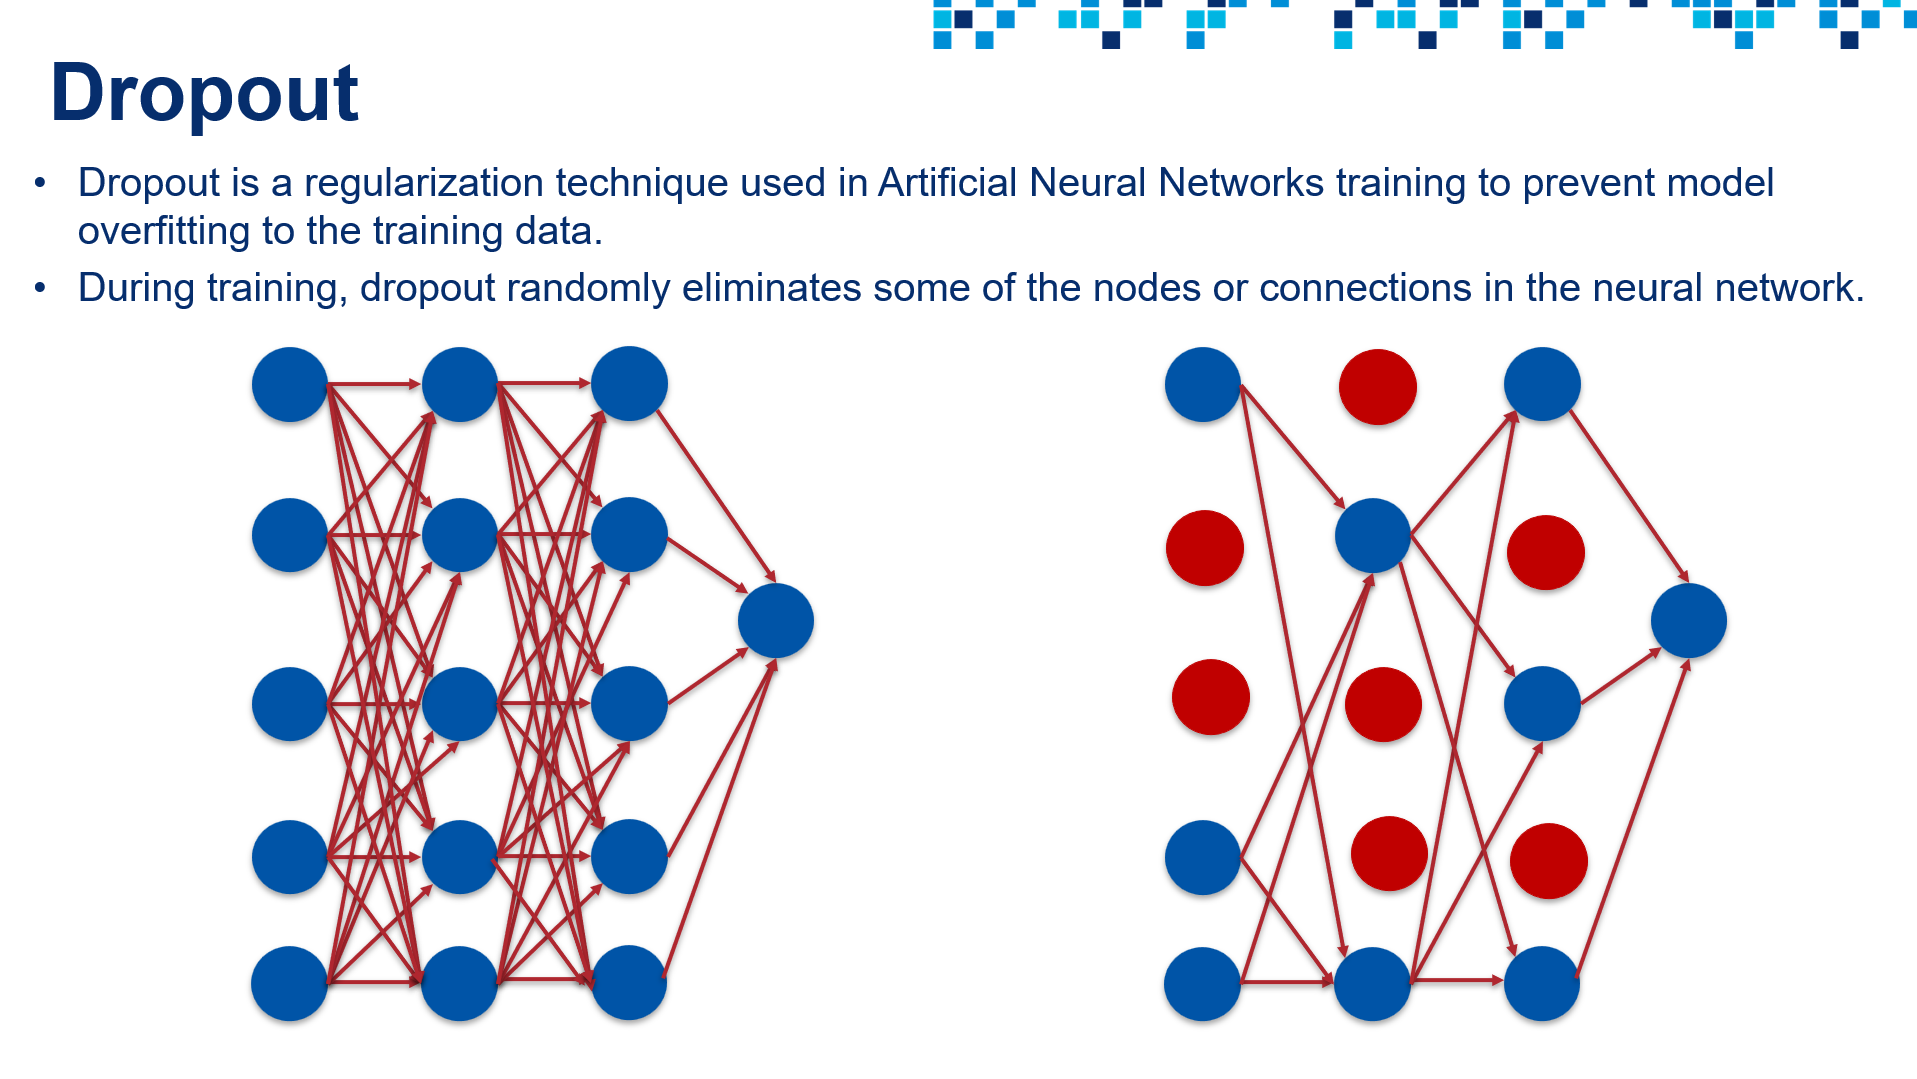

In [ ]:
# Let's train an Artificial Neural Network to solve regression type problems using Tensorflow and Keras
!pip install tensorflow-cpu
import tensorflow as tf
from tensorflow import keras


In [ ]:
# Let's perform input data scaling using MinMaxScaler() from Scikit-Learn library 
# Data scaling is an important pre-processing step in Artificial Neural Networks training 
# It improves model performance and speed up the training process
# Scaling works by normalizing features so they can have similar ranges and distributions so no feature dominates other features  
# Note that tree-based algorithms do not require data scaling
# MinMaxScaler scales the data to a range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler();
scaler.fit(X_train);

In [ ]:
# Apply data scaling to the training and testing datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Let's view the scaled training set
X_train_scaled 

In [ ]:
# Let's perform output data scaling 
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(y_train))

# Apply data scaling to the training and testing datasets
y_train_scaled = scaler.transform(pd.DataFrame(y_train))
y_test_scaled = scaler.transform(pd.DataFrame(y_test))

In [ ]:
# Size of the input dataset
X_train.shape[1]

In [ ]:
# Let's build our ANN using Keras API 
# Keras sequential model allows for building ANNs which consist of sequential layers (input, hidden..etc.)
# Dense means each neuron in the layer is fully connected to all the neurons in the previous layer  
# Normalization layer normalizes its inputs by applies a transformation to maintain the mean output close to 0 
# and standard deviation close to 1.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout

ANN_model = Sequential()
ANN_model.add(Normalization(input_shape = [X_train.shape[1],], axis = None))
ANN_model.add(Dense(1024, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(512, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(256, activation = 'sigmoid'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(32, activation = 'sigmoid'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(units = 1, activation = 'linear'))

In [ ]:
# Let's obtain the model summary
ANN_model.summary()

In [ ]:
# Let's compile the model
# Adam optimizer is the extended version of stochastic gradient descent algorithm 
# It works well in deep learning applications and ANNs training 
ANN_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001), loss = 'mean_squared_error')

# Let's fit the model using 500 epochs
history = ANN_model.fit(X_train_scaled, y_train_scaled, epochs = 500)

In [ ]:
# Let's generate model predictions using the testing dataset and then scale the data back to its original range values
y_predict_scaled = ANN_model.predict(X_test_scaled)
y_predict = scaler.inverse_transform(y_predict_scaled)
y_test = scaler.inverse_transform(y_test_scaled)

In [ ]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

In [ ]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

**PRACTICE OPPORTUNITY:** 
- **Change the architecture of the existing Artificial Neural Network model by introducing an additional dense layer with Dropout. Feel free to choose the number of neurons.**
- **Print the model summary and list the number of trainable parameters**

# TRAIN AND EVALUATE AN XGBOOST MODEL

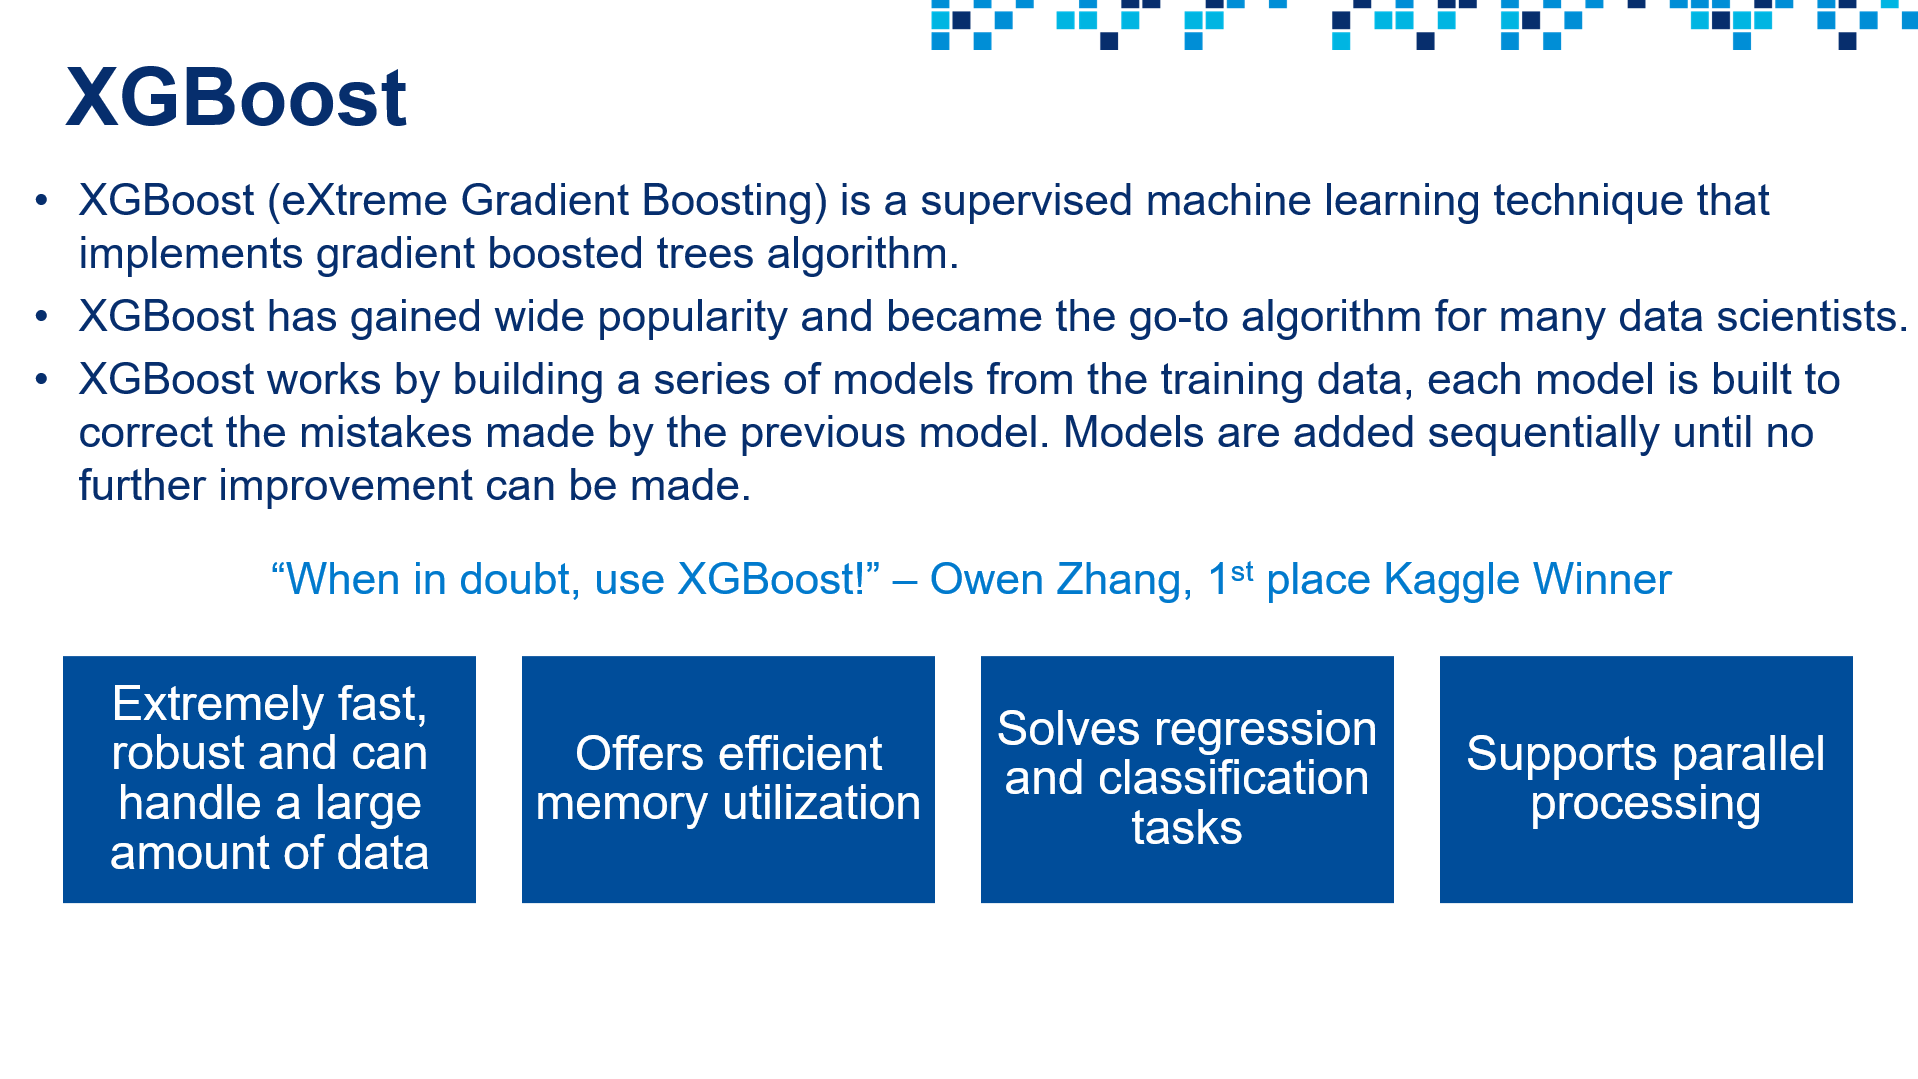

- XGBoost Paper: https://arxiv.org/pdf/1603.02754.pdf
- XGBoost Library Documentation: https://xgboost.readthedocs.io/en/latest/tutorials/model.html


In [ ]:
# Install XGBoost 
!pip install xgboost

# Import XGBoost
import xgboost as xgb

In [ ]:
# Train an XGBoost regressor model 
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                             learning_rate = 0.1, 
                             max_depth = 3, 
                             n_estimators = 200);
xgb_model.fit(X_train, y_train);

In [ ]:
# Make predictions on the test data
y_predict = xgb_model.predict(X_test)
y_predict

In [ ]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

In [ ]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

**PRACTICE OPPORTUNITY:**
- **Set the max_depth hyperparameter to 1 and retrain the XGBoost model**
- **Calculate regression metrics and comment on the results**

# PERFORM HYPERPARAMETERS OPTIMIZATION

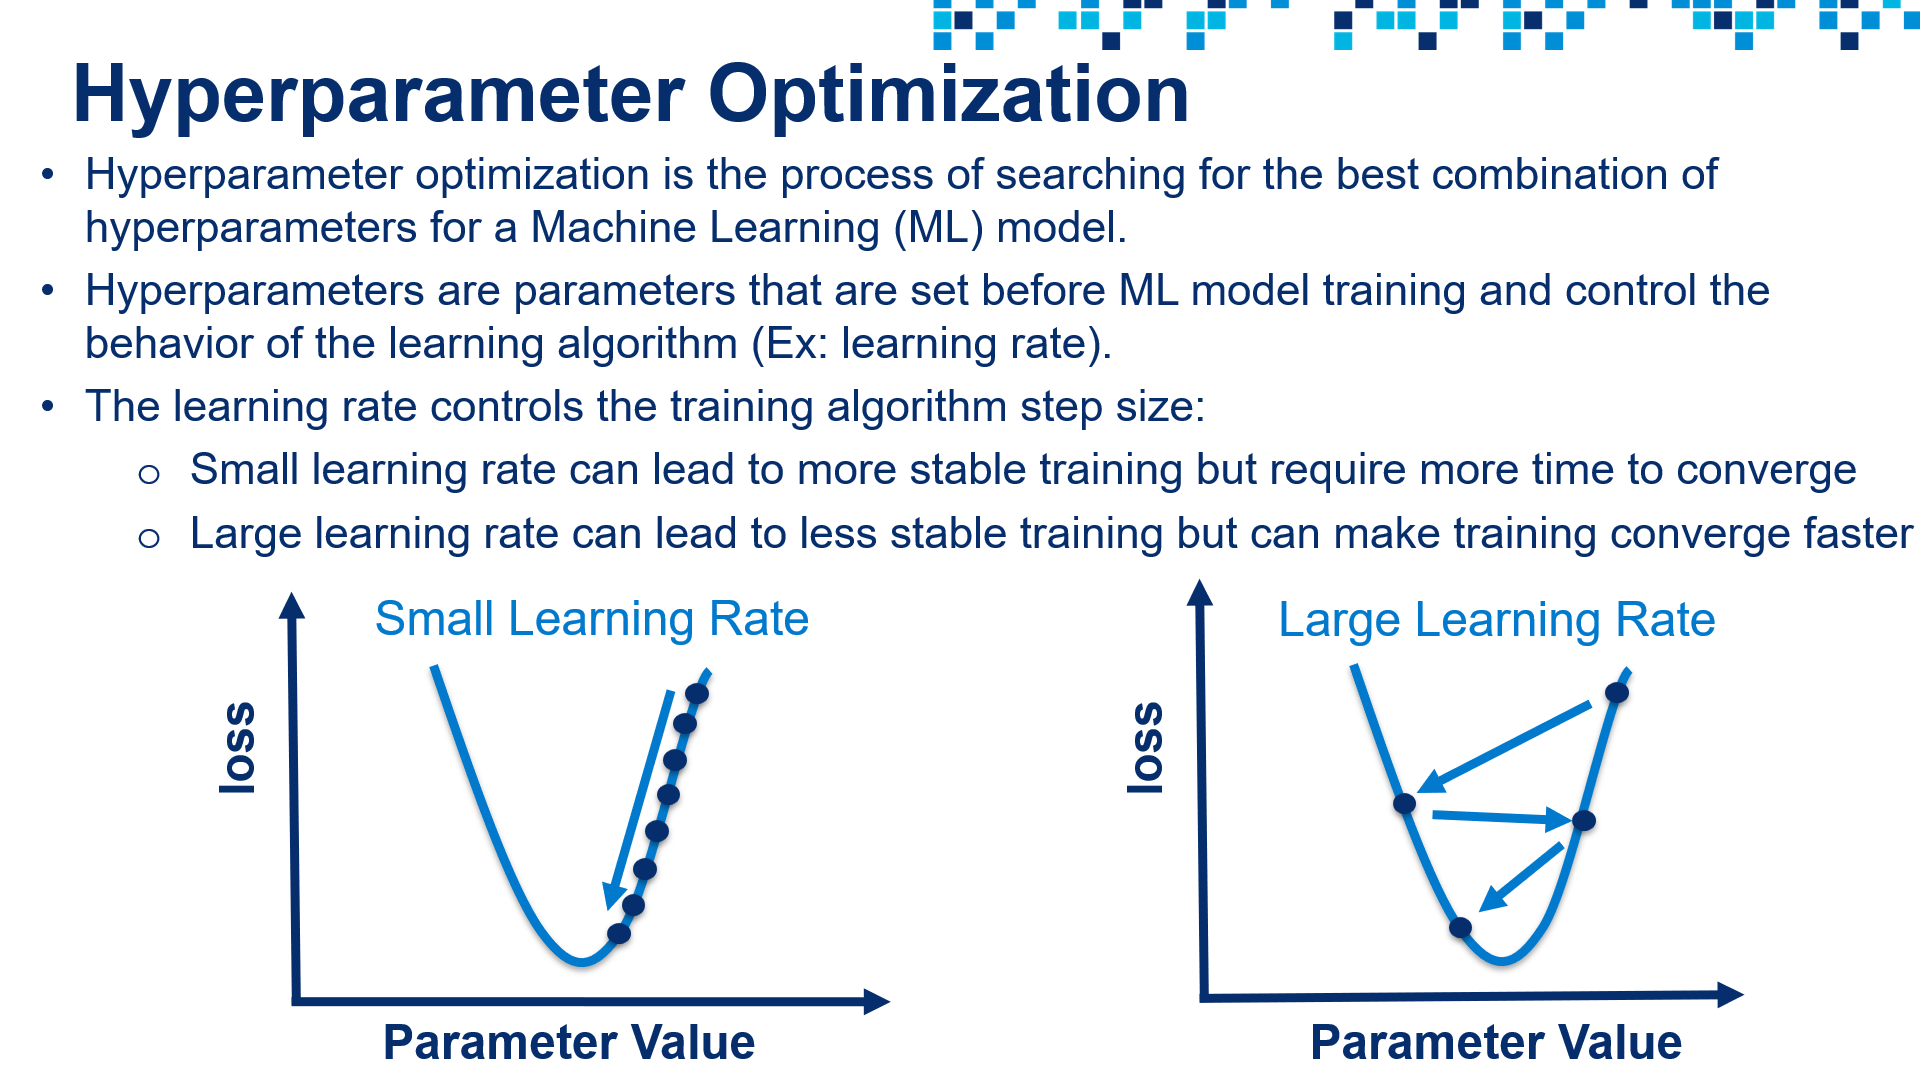

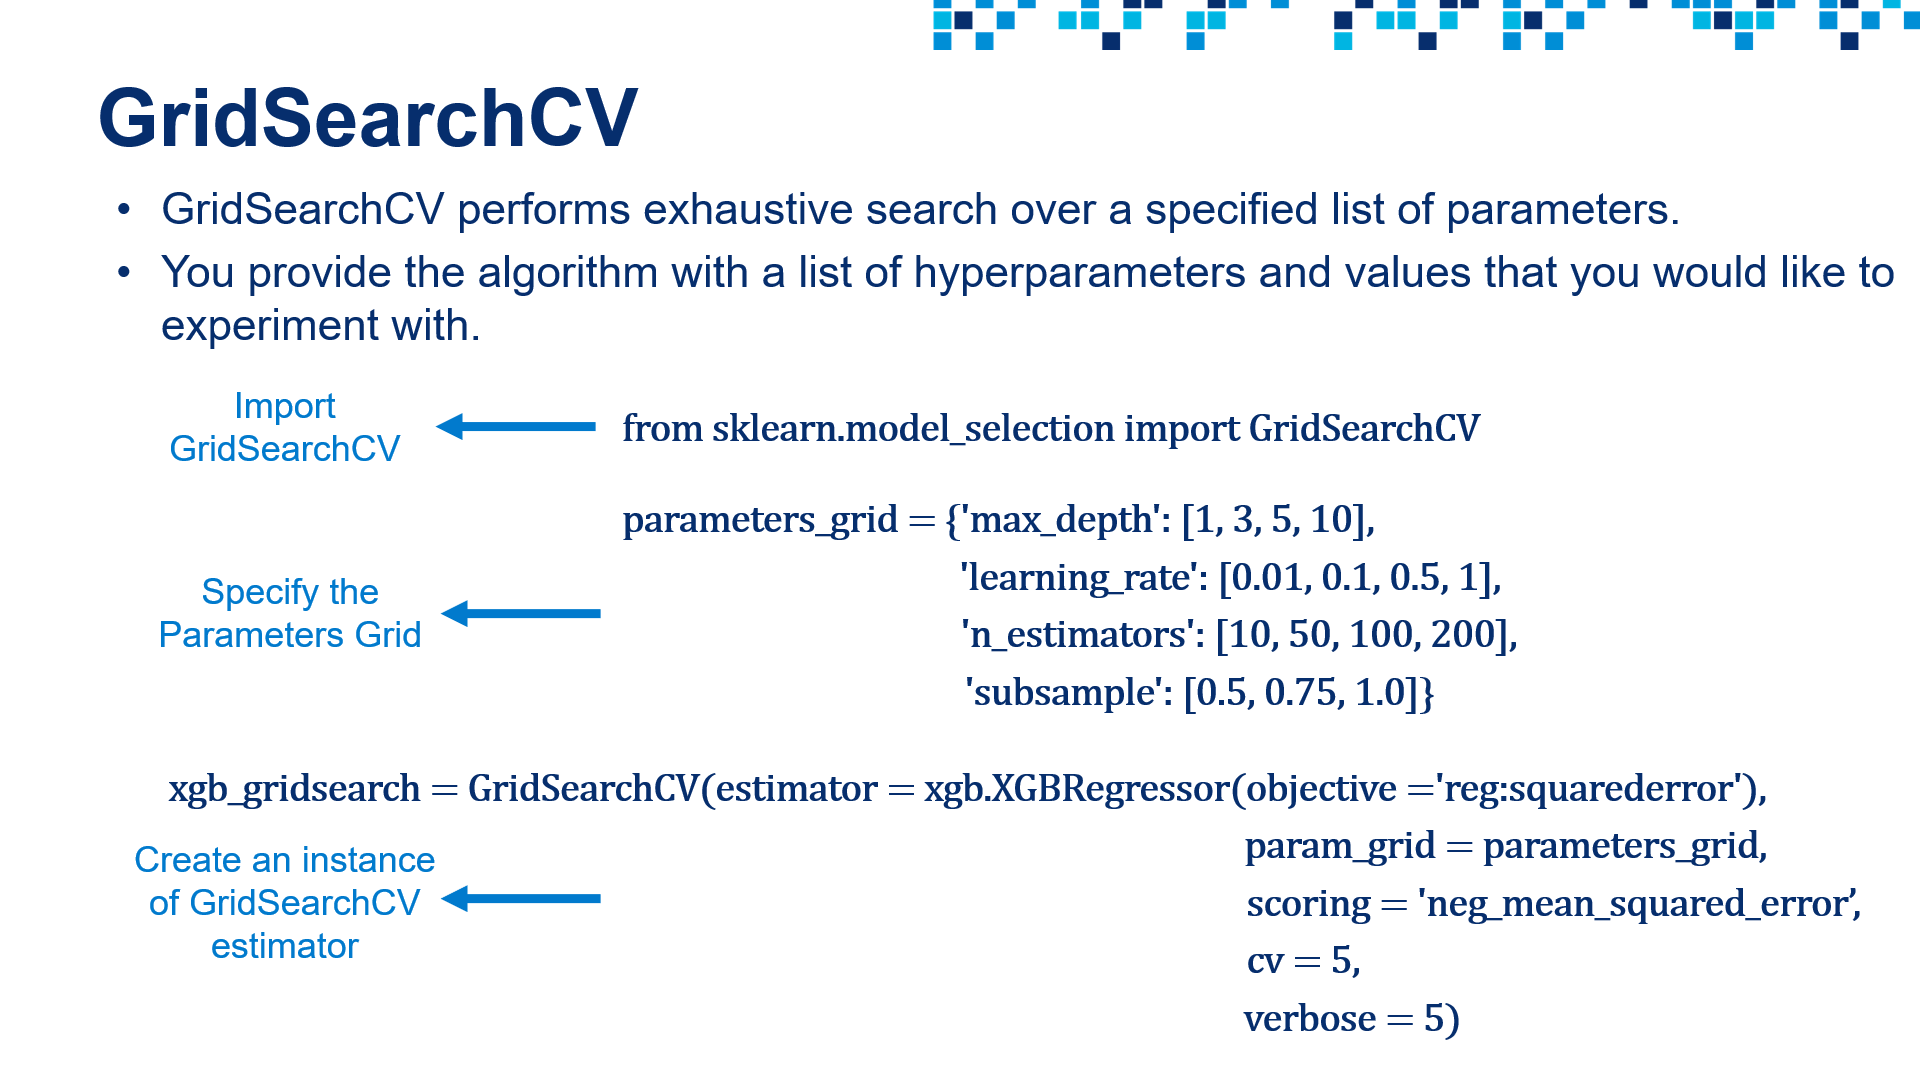

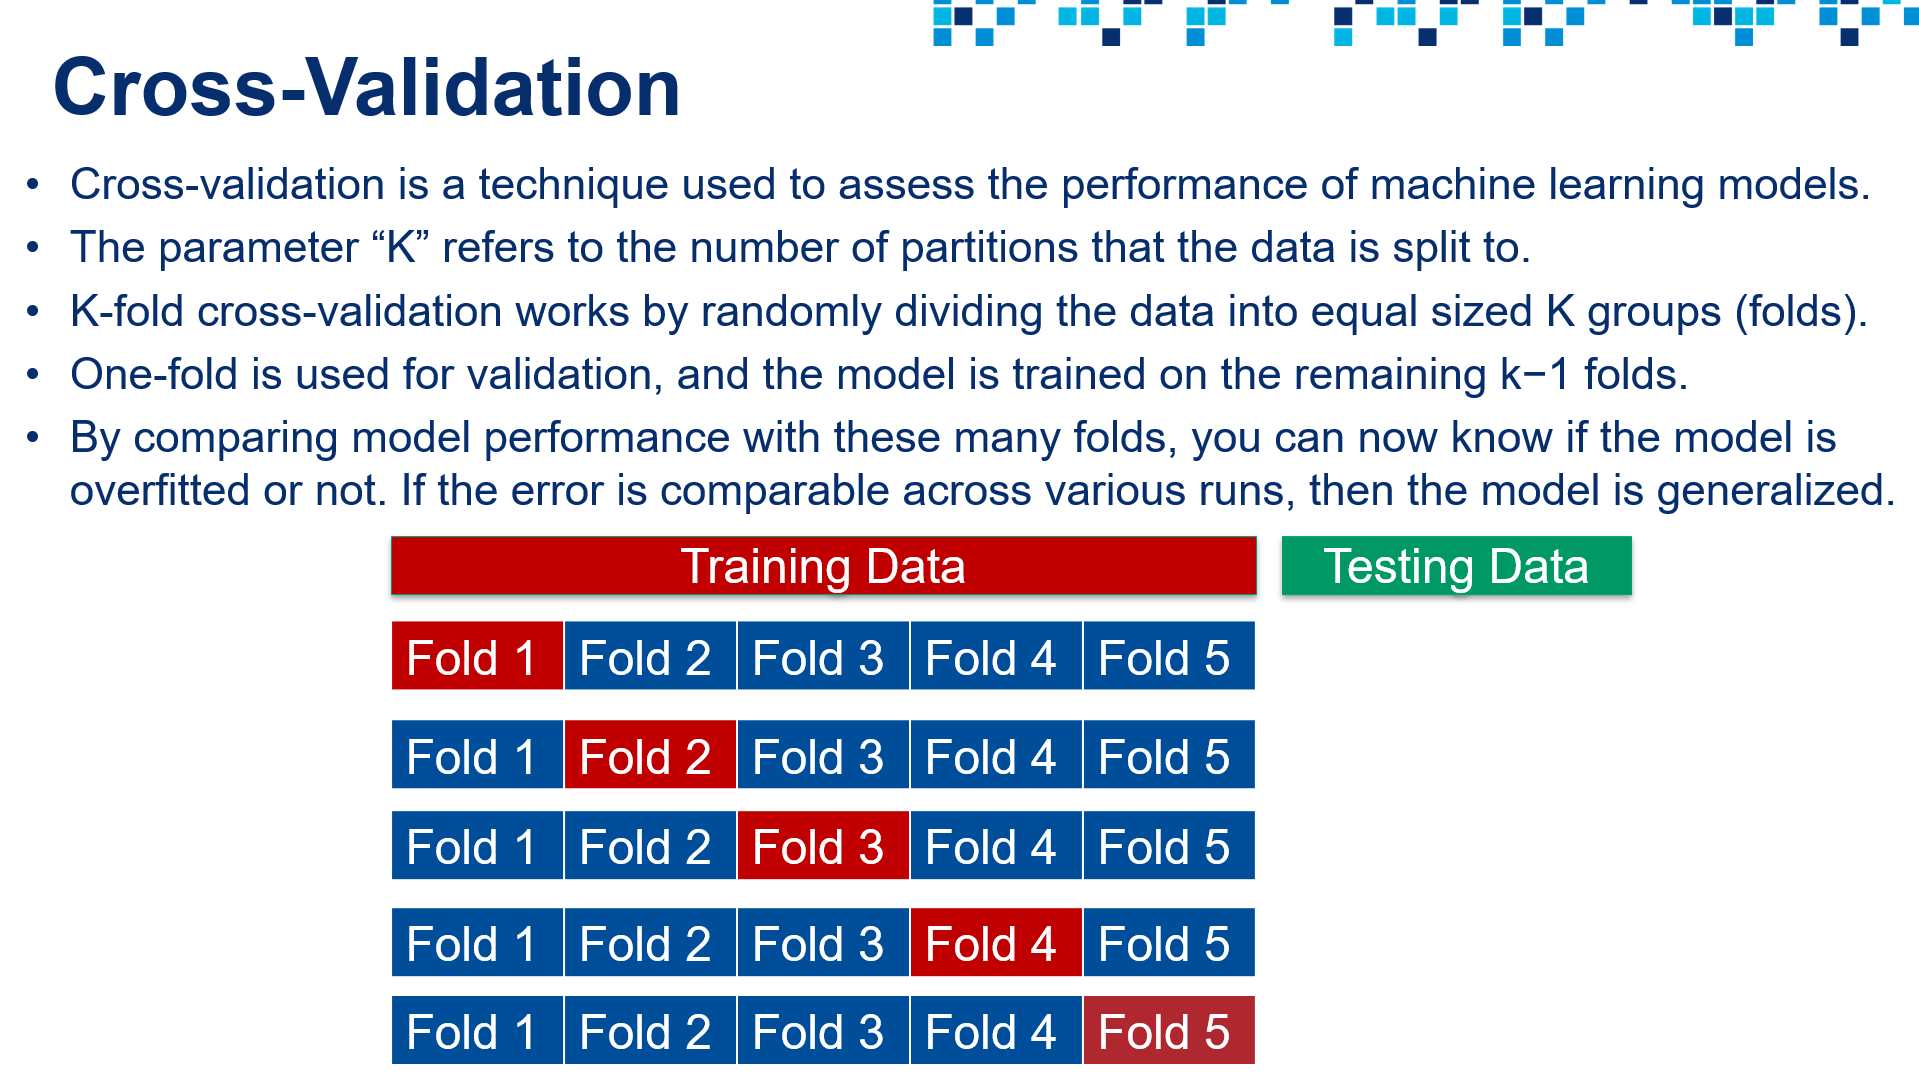

In [ ]:
# GridSearchCV performs exhaustive search over a specified list of parameters
# You provide the algorithm with the hyperparameters and values you would like to experiment with 
# Note that you will have the following number of combinations: 4 * 4 * 4 * 3 = 192
# We will run each combination 5 times since we set the cross validation = 5
# Total number of runs = 192 * 5 = 960 fits

from sklearn.model_selection import GridSearchCV

In [ ]:
# Specify the parameters grid
parameters_grid = {'max_depth': [1, 3, 5, 10],
                   'learning_rate': [0.01, 0.1, 0.5, 1],
                   'n_estimators': [10, 50, 100, 200],
                   'subsample': [0.5, 0.75, 1.0]} 

In [ ]:
# Note that "neg_mean_squared_error" is used for scoring since our goal is to minimize the error
# GridSearchCV() ranks all algorithms (estimators) and specifies which one is the best
# cv stands for the number of cross-validation folds which is set to 5 by default
# Verbose controls the verbosity: the higher the number, the more messages to be displayed

xgb_gridsearch = GridSearchCV(estimator = xgb.XGBRegressor(objective = 'reg:squarederror'), 
                              param_grid = parameters_grid, 
                              scoring = 'neg_mean_squared_error',  
                              cv = 5, 
                              verbose = 5)

In [ ]:
# Let's fit the model
xgb_gridsearch.fit(X_train, y_train);

In [ ]:
# Indicate best parameters after grid search optimization
xgb_gridsearch.best_params_

In [ ]:
# Display the best estimator values
xgb_gridsearch.best_estimator_

In [ ]:
# Generate predictions based on the optimal model parameters
y_predict = xgb_gridsearch.predict(X_test)
y_predict

In [ ]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

In [ ]:
# Plot model predictions "y_predict" vs. actual outputs "y_test" (ground truth data)
plt.figure(figsize = (13, 8))
plt.plot(y_predict, y_test, 'o', color = 'r', markersize = 10)
plt.xlabel('Model Predictions')
plt.ylabel('Actual Values (Ground Truth)')
plt.title('Model Predictions Vs. Actual Values (Ground Truth)');

**PRACTICE OPPORTUNITY:**
- **Train and evaluate an XGBoost algorithm to predict the percentage quarterly change in revenue instead of the percentage quarterly change in EPS. Note that this target variable is available in the original dataset and titled "% Change in Quarterly Revenue (Target Output)".**
- **Perform hyperparameters tuning and evaluate trained model performance and comment on the results.**

# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Write a Python code that performs the following tasks:**
     - **Filter out the Pandas DataFrame df to only select rows containing Apple data with Ticker Symbol 'AAPL'. Place the results in a new Pandas DataFrame titled apple_df.**
     - **Obtain the maximum quarterly revenue of Apple and the corresponding date**
     - **Perform a sanity check by comparing the calculated maximum quarterly revenue with numbers posted online on Yahoo Finance: https://ca.finance.yahoo.com/quote/AAPL/financials?p=AAPL**

In [ ]:
# Let's filter out df DataFrame to only obtain Apple (Ticker: 'AAPL') data
apple_df = df[ df['Ticker'] == 'AAPL' ]
apple_df

In [ ]:
# Let's obtain the maximum value in the "Revenue" column
# Perform a sanity check using Yahoo Finance: https://ca.finance.yahoo.com/quote/AAPL/financials?p=AAPL

apple_df['Revenue'].max()

In [ ]:
# Let's display the row containing the maximum "Revenue"
apple_df [apple_df['Revenue'] == apple_df['Revenue'].max()]

**PRACTICE OPPORTUNITY SOLUTION:**
- **Write a Python code that performs the following tasks:**
    - **Filter out the Pandas DataFrame df to only contain rows pertaining to Nvidia corporation (Ticker Symbol: NVDA)**
    - **Display the histogram for the output column "% Change in Quarterly EPS (Target Output)" for Nvidia corporation using 100 bins**

In [ ]:
# Let's filter out the Pandas DataFrame "df" to only select Apple data (Ticker: 'AAPL')
nvidia_df = df[ df['Ticker'] == 'NVDA' ]
nvidia_df

In [ ]:
# Let's plot the histogram for the target output column for Nvidia 
fig = px.histogram(nvidia_df[ '% Change in Quarterly EPS (Target Output)'] * 100, nbins = 100)
fig.update_layout({'plot_bgcolor': "white"})

**PRACTICE OPPORTUNITY SOLUTION:**
- **Write a Python code that performs the following tasks:**
    - **Read the "financial_data.csv" file using Pandas and place the result in a Pandas DataFrame titled "df"** 
    - **Filter "df" Pandas DataFrame to only include General Electric data (Ticker Symbol: GE), and place the results in a Pandas DataFrame titled "general_electric_df"**
    - **Perform one-hot encoding to the "Fiscal Period" column in "general_electric_df" DataFrame using Pandas pd.get_dummies() function**
    - **Drop the "Fiscal Period" column from "general_electric_df" DataFrame and concatenate the one-hot encoded data**

In [ ]:
# Use Pandas to read financial data (the csv file is included in the course package) 
df = pd.read_csv('financial_data.csv')

# Let's filter out the Pandas DataFrame "df" to only select GE data
general_electric_df = df[ df['Ticker'] == 'GE' ]
general_electric_df

In [ ]:
# Let's display the one-hot encoded version of the "Fiscal Period" column
fiscal_encoded = pd.get_dummies(general_electric_df['Fiscal Period'])
fiscal_encoded

In [ ]:
# Drop the 'Fiscal Period' column from the Pandas DataFrame
general_electric_df = general_electric_df.drop('Fiscal Period', axis = 1)

# Concatenate the original DataFrame and the one-hot encoded "Fiscal Period" column
general_electric_df = pd.concat([general_electric_df, fiscal_encoded], axis = 1)
general_electric_df

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Using Scikit-Learn Library, split the data into 30% for testing and 70% for training** 
- **Perform a sanity check by obtaining the shape of the training and testing dataset**
- **Enable shuffling and rerun the code. Comment on your results.**

In [ ]:
# Let's perform train/test/validation data split
# Drop the columns that we do not need for model training

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [ ]:
# Check out the shape of input data training, testing and validation 
print(X_train.shape, X_test.shape)

In [ ]:
# Check out the shape of output data training, testing and validation 
print(y_train.shape, y_test.shape)

In [ ]:
X_train

In [ ]:
X_test

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Set the fit_intercept attribute to False, retrain the multiple linear regression model and evaluate its performance**
- **Display the estimated coefficients and Y-intercept. What do you conclude?**
- **Hint: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html**

In [ ]:
# Retrain the model after setting fit_intercept to False
# Note that this will force the regression line to go through the origin (0,0)
linear_regression_model = linear_model.LinearRegression(fit_intercept = False)
linear_regression_model.fit(X_train, y_train)

y_predict = linear_regression_model.predict(X_test)

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE)

In [ ]:
# Display the trained model Y intercept
print(linear_regression_model.intercept_)

# Display the estimated coefficients for the linear regression problem
print(linear_regression_model.coef_)

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Increase the maximum depth of the tree by setting max_depth = 100** 
- **Retrain the Random Forest Regression model and evaluate its performance**

In [ ]:
# Train a Random Forest Regression model with larger max_depth
# n_estimators: represents the number of trees in the forest
# max_depth: represents the maximum depth of the tree
random_forest_model = RandomForestRegressor(n_estimators = 5, max_depth = 100);
random_forest_model.fit(X_train, y_train);

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Using Google Tensorflow Playground, perform the following tasks:** 
    - **Select the spiral dataset and set the ratio of the training to test data to 70%/30%**
    - **Set the noise level to 20 and the batch size to 15**
    - **Choose an Artificial Neural Network with one hidden layer that contains 6 neurons and set the activation function to Rectified Linear Unit (ReLU). Train the model and record the training and test loss after 5000 epochs.**   
    - **Modify the Artificial Neural Network architecture by adding 3 hidden layers with 8 neurons each. Retrain the model and record the training and test loss after 1000 epochs.**
    - **Assess both networks performance and comment on your results**

In [ ]:
# Please watch the practice opportunity solution video 

**PRACTICE OPPORTUNITY SOLUTION:** 
- **Change the architecture of the existing Artificial Neural Network model by introducing an additional dense layer with Dropout. Feel free to choose the number of neurons.**
- **Print the model summary and list the number of trainable parameters.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout

ANN_model = Sequential()
ANN_model.add(Normalization(input_shape = [X_train.shape[1],], axis = None))
ANN_model.add(Dense(1024, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(512, activation = 'relu'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(256, activation = 'sigmoid'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(256, activation = 'sigmoid')) # additional layer
ANN_model.add(Dropout(0.3))                       # additional layer
ANN_model.add(Dense(32, activation = 'sigmoid'))
ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(units = 1, activation = 'sigmoid'))
ANN_model.summary()



**PRACTICE OPPORTUNITY SOLUTION:**
- **Set the max_depth hyperparameter to 1 and retrain the XGBoost model**
- **Calculate regression metrics and comment on the results**

In [ ]:
# Train an XGBoost regressor model 
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 1, n_estimators = 100)
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_predict = xgb_model.predict(X_test)


RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

**PRACTICE OPPORTUNITY SOLUTION:**
- **Train and evaluate an XGBoost algorithm to predict the percentage quarterly change in revenue instead of the percentage quarterly change in EPS. Note that this target variable is available in the original dataset and titled "% Change in Quarterly Revenue (Target Output)".**
- **Perform hyperparameters tuning and evaluate trained model performance and comment on the results.**

In [ ]:
# Use Pandas to read financial data (the csv file is included in the course package) 
df = pd.read_csv('financial_data.csv')

# Let's filter out the Pandas DataFrame "df" to only select Apple data (Ticker: 'AAPL')
apple_df = df[ df['Ticker'] == 'AAPL' ]
apple_df

In [ ]:
# Drop the following columns from the Pandas DataFrame
cols_to_drop = ['Ticker','Sector', 'Industry','Company Name', 'Report Date', 'Currency',
                'Fiscal Year', 'Publish Date', 'Restated Date', '% Change in Quarterly EPS (Target Output)']

apple_df = apple_df.drop(columns = cols_to_drop)

# Let's display the one hot-encoded version of the "Fiscal Period" column
fiscal_encoded = pd.get_dummies(apple_df['Fiscal Period'])

# Drop the 'Fiscal Period' column from the Pandas DataFrame
apple_df = apple_df.drop('Fiscal Period', axis = 1)

# Concatenate the original DataFrame and the one hot encoded "Fiscal Period" column
apple_df = pd.concat([apple_df, fiscal_encoded], axis = 1)

# Split the data into input (X) and output (y)
X = apple_df.drop('% Change in Quarterly Revenue (Target Output)', axis = 1)
y = apple_df['% Change in Quarterly Revenue (Target Output)']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = False)

In [ ]:
# Train an XGBoost regressor model 
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 1, n_estimators = 50, subsample = 1.0);
xgb_model.fit(X_train, y_train);

# Make predictions on the test data
y_predict = xgb_model.predict(X_test)
y_predict

In [ ]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

In [ ]:
# Specify the parameters grid
parameters_grid = {'max_depth': [1, 3, 5, 10],
                   'learning_rate': [0.01, 0.1, 0.5, 1],
                   'n_estimators': [10, 50, 100, 200],
                   'subsample': [0.5, 0.75, 1.0]} 

In [ ]:
# Note that "neg_mean_squared_error" is used for scoring since our goal is to minimize the error
# GridSearchCV() ranks all algorithms (estimators) and specifies which one is the best
# cv stands for the number of cross-validation folds which is set to 5 by default
# Verbose controls the verbosity: the higher the number, the more messages to be displayed

xgb_gridsearch = GridSearchCV(estimator = xgb.XGBRegressor(objective = 'reg:squarederror'), 
                              param_grid = parameters_grid, 
                              scoring = 'neg_mean_squared_error',  
                              cv = 5, 
                              verbose = 5)

In [ ]:
xgb_gridsearch.fit(X_train, y_train);

In [ ]:
# Generate predictions based on the optimal model parameters
y_predict = xgb_gridsearch.predict(X_test)
y_predict

In [ ]:
# Let's generate various regression metrics by comparing "y_predict" vs. actual outputs "y_test" (ground truth data)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np 

RMSE = float(np.sqrt(mean_squared_error(y_test, y_predict)))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('Root Mean Squared Error (RMSE) =', RMSE, '\nMean Squared Error (MSE) =', MSE, '\nMean Absolute Error (MAE) =', MAE) 

# EXCELLENT JOB!